In [1]:
# import the transcriptome data
import os
import dandelion as ddl
import pandas as pd
import scanpy as sc
sc.logging.print_header()

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.4.1 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1 leidenalg==0.8.2


In [2]:
ddl.__version__

'0.0.26'

In [3]:
os.getcwd()

'/lustre/scratch117/cellgen/team297/kt16/newcastle_covid/notebooks'

In [4]:
os.chdir('/lustre/scratch117/cellgen/team297/kt16/newcastle_covid')

In [5]:
# Set up the sample info
sampleInfo = pd.read_csv('sample_id_table.csv')
sampleInfo

,PATIENT ID,GEX SANGER ID,CITE ID,TCR ID,BCR ID
0,COVID-002,MH9143270,MH9143278,MH9143286,MH9143294
1,COVID-003,MH8919326,MH8919334,MH8919342,MH8919350
2,COVID-004,MH9179821,MH9179829,MH9179838,MH9185499
3,COVID-004v2,newcastle004v2,newcastle004v2,newcastle004v2,newcastle004v2
4,COVID-007,MH9143320,MH9143328,MH9143336,MH9143344
...,...,...,...,...,...
67,IVLPS-3-90m,MH8919232,MH8919240,MH8919248,MH8919256
68,IVLPS-4-10h,MH8919277,MH8919285,MH8919293,MH9183190
69,IVLPS-4-90m,MH8919276,MH8919284,MH8919292,MH9183189
70,IVLPS-6-10h,MH8919279,MH8919287,MH8919295,MH9183192


In [6]:
# prepare a Sanger BCR:GEX id dictionary
sampledict = ddl.utl.dict_from_table(sampleInfo, columns = ('BCR ID','GEX SANGER ID'))
sampledict

{'MH9143294': 'MH9143270',
 'MH8919350': 'MH8919326',
 'MH9185499': 'MH9179821',
 'newcastle004v2': 'newcastle004v2',
 'MH9143344': 'MH9143320',
 'MH9185500': 'MH9179822',
 'MH9143345': 'MH9143321',
 'MH9185491': 'MH9143420',
 'MH9143295': 'MH9143271',
 'MH9185501': 'MH9179823',
 'MH9185502': 'MH9179824',
 'MH9185503': 'MH9179825',
 'MH9143346': 'MH9143322',
 'newcastle20': 'newcastle20',
 'newcastle21': 'newcastle21',
 'newcastle21v2': 'newcastle21v2',
 'MH9185492': 'MH9143421',
 'MH9143296': 'MH9143272',
 'MH9185504': 'MH9179826',
 'MH9143347': 'MH9143323',
 'MH9183197': 'MH9143370',
 'MH9143348': 'MH9143324',
 'MH8919351': 'MH8919327',
 'MH9143297': 'MH9143273',
 'MH8919352': 'MH8919328',
 'MH9143349': 'MH9143325',
 'MH9185493': 'MH9143422',
 'MH9183198': 'MH9143371',
 'MH9185494': 'MH9143423',
 'MH9143298': 'MH9143274',
 'MH9185495': 'MH9143424',
 'MH9185497': 'MH9143426',
 'MH8919353': 'MH8919329',
 'MH9185505': 'MH9179827',
 'MH8919354': 'MH8919330',
 'newcastle49': 'newcastle49'

In [7]:
os.chdir('newcastle/BCR')
os.getcwd()

'/lustre/scratch117/cellgen/team297/kt16/newcastle_covid/newcastle/BCR'

In [9]:
# format the contig names to be similiar structure to transcriptomic data
samples = ['BCR_' + str(s) for s in sampleInfo['BCR ID']]
ddl.pp.format_fastas(samples, suffix = [sampledict[s] for s in sampleInfo['BCR ID']], sep = '-')

Formating fasta(s) : 100%|██████████| 72/72 [02:32<00:00,  2.11s/it]


In [10]:
# reannotate the vdj genes with igblastn as per changeo's method
ddl.pp.reannotate_genes(samples)

Assigning genes : 100%|██████████| 72/72 [1:13:23<00:00, 61.16s/it] 


In [11]:
# run reassign alleles
# create a dictionary to facilitate that
group_dict = {
    'COVID-002':['BCR_MH9143294'],
    'COVID-003':['BCR_MH8919350'],
    'COVID-004':['BCR_MH9185499','BCR_newcastle004v2'],
    'COVID-007':['BCR_MH9143344'],
    'COVID-008':['BCR_MH9185500'],
    'COVID-010':['BCR_MH9143345'],
    'COVID-011':['BCR_MH9185491'],
    'COVID-012':['BCR_MH9143295'],
    'COVID-013':['BCR_MH9185501'],
    'COVID-014':['BCR_MH9185502'],
    'COVID-017':['BCR_MH9185503'],
    'COVID-019':['BCR_MH9143346'],
    'COVID-020':['BCR_newcastle20'],
    'COVID-021':['BCR_newcastle21', 'BCR_newcastle21v2'],
    'COVID-022':['BCR_MH9185492'],
    'COVID-023':['BCR_MH9143296'],
    'COVID-024':['BCR_MH9185504'],
    'COVID-027':['BCR_MH9143347'],
    'COVID-028':['BCR_MH9183197'],
    'COVID-029':['BCR_MH9143348'],
    'COVID-030':['BCR_MH8919351','BCR_MH9143297', 'BCR_MH8919352'],
    'COVID-031':['BCR_MH9143349'],
    'COVID-032':['BCR_MH9185493'],
    'COVID-034':['BCR_MH9183198'],
    'COVID-036':['BCR_MH9185494'],
    'COVID-037':['BCR_MH9143298'],
    'COVID-039':['BCR_MH9185495'],
    'COVID-043':['BCR_MH9185497'],
    'COVID-045':['BCR_MH8919353'],
    'COVID-046':['BCR_MH9185505'],
    'COVID-047':['BCR_MH8919354'],
    'COVID-049':['BCR_newcastle49'],
    'COVID-050':['BCR_MH9143299'],
    'COVID-053':['BCR_MH9185498'],
    'COVID-054':['BCR_MH9185496'],
    'COVID-055':['BCR_MH9185506'],
    'COVID-057':['BCR_MH8919355'],
    'COVID-058':['BCR_MH9183199'],
    'COVID-059':['BCR_newcastle59'],
    'COVID-060':['BCR_MH9183200'],
    'COVID-061':['BCR_MH9143350'],
    'COVID-062':['BCR_MH9143351'],
    'COVID-063':['BCR_MH9143300'],
    'COVID-064':['BCR_MH9143301'],
    'COVID-065':['BCR_newcastle65'],
    'COVID-066':['BCR_MH9183185'],
    'COVID-067':['BCR_MH8919356'],
    'COVID-068':['BCR_MH9183186'],
    'COVID-069':['BCR_MH9183195'],
    'COVID-070':['BCR_MH9183196'],
    'COVID-071':['BCR_MH8919250'],
    'COVID-072':['BCR_MH9183187'],
    'COVID-073':['BCR_MH9183188'],
    'COVID-074':['BCR_newcastle74'],
    'COVID-075':['BCR_MH8919251'],
    'COVID-076':['BCR_MH8919357'],
    'IVLPS-1':['BCR_MH8919253', 'BCR_MH8919252'],
    'IVLPS-12':['BCR_MH9183194', 'BCR_MH9183193'],
    'IVLPS-2':['BCR_MH8919255', 'BCR_MH8919254'],
    'IVLPS-3':['BCR_MH8919257', 'BCR_MH8919256'],
    'IVLPS-4':['BCR_MH9183190', 'BCR_MH9183189'],
    'IVLPS-6':['BCR_MH9183192', 'BCR_MH9183191']}

In [12]:
# create a modified dictionary for the sample id
sampledict2 = {}
for key, record in sampledict.items():
    sampledict2['BCR_'+key] = record

Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


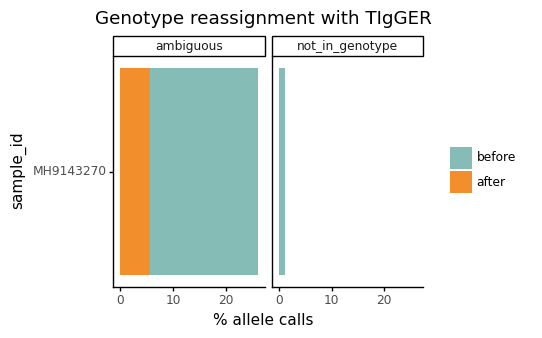

<ggplot: (1409505637861)>


Processing data file(s) : 100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


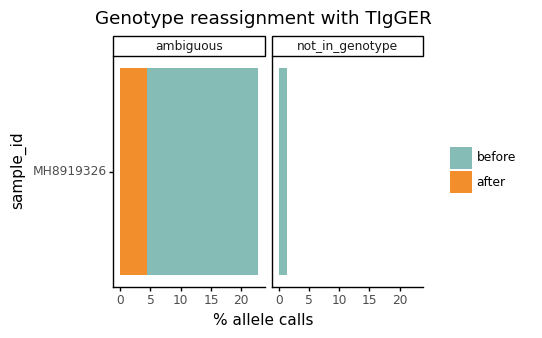

<ggplot: (1409500048693)>


Processing data file(s) : 100%|██████████| 2/2 [00:04<00:00,  2.30s/it]


Concatenating objects
      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


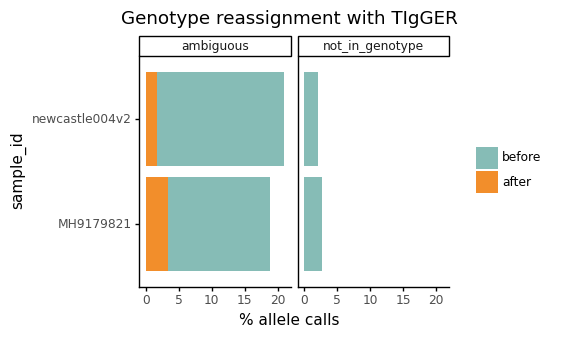

<ggplot: (1409500048397)>


Processing data file(s) : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


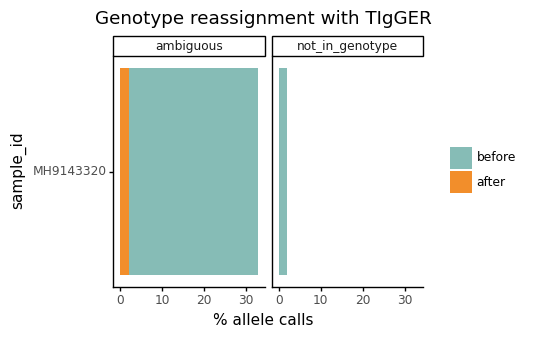

<ggplot: (1409498858809)>


Processing data file(s) : 100%|██████████| 1/1 [00:06<00:00,  6.41s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


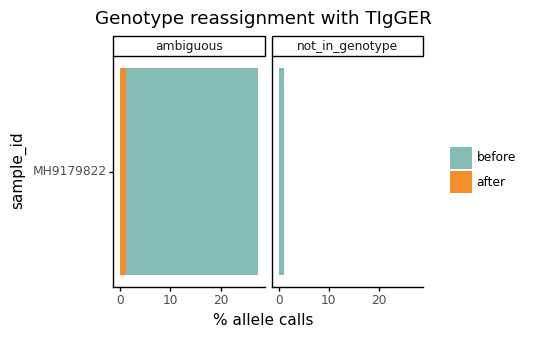

<ggplot: (1409496146457)>


Processing data file(s) : 100%|██████████| 1/1 [00:04<00:00,  4.52s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


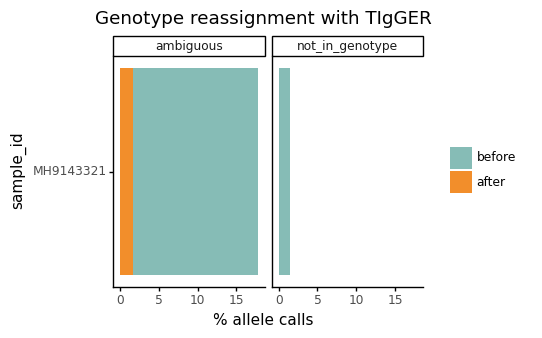

<ggplot: (1409498862445)>


Processing data file(s) : 100%|██████████| 1/1 [00:05<00:00,  5.35s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


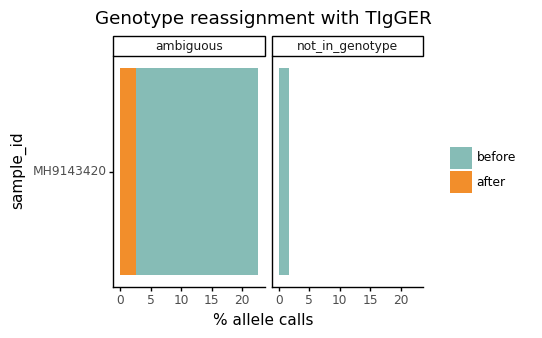

<ggplot: (1409495215213)>


Processing data file(s) : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


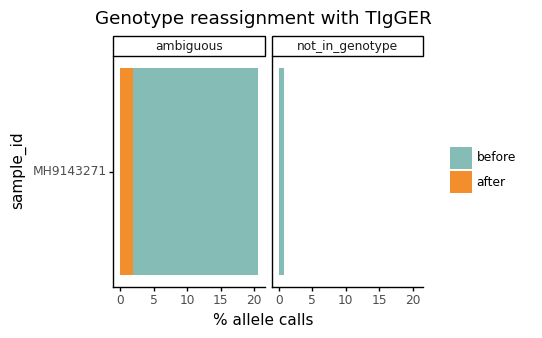

<ggplot: (1409495261945)>


Processing data file(s) : 100%|██████████| 1/1 [00:05<00:00,  5.42s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


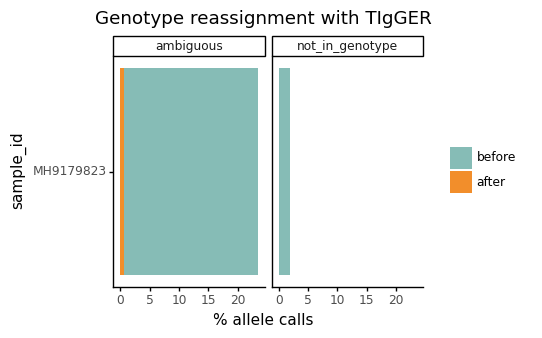

<ggplot: (1409491873333)>


Processing data file(s) : 100%|██████████| 1/1 [00:08<00:00,  8.81s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


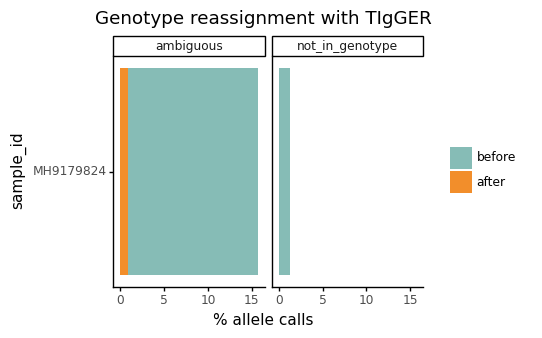

<ggplot: (1409490499525)>


Processing data file(s) : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


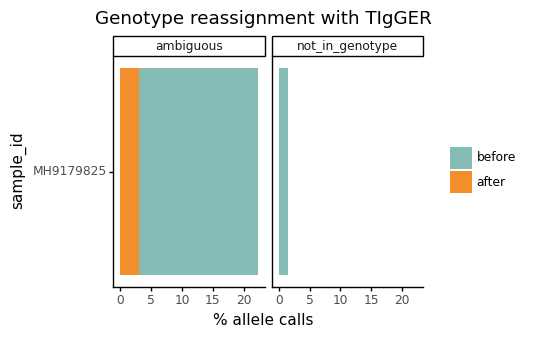

<ggplot: (1409505772849)>


Processing data file(s) : 100%|██████████| 1/1 [00:04<00:00,  4.02s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


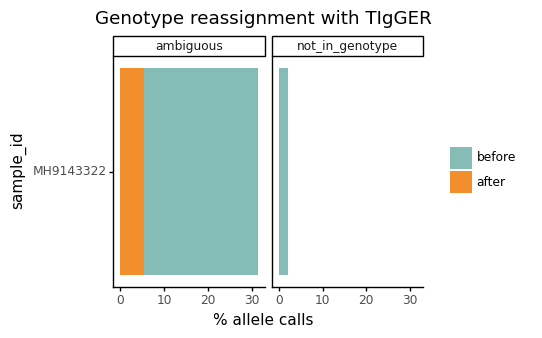

<ggplot: (1409498840189)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


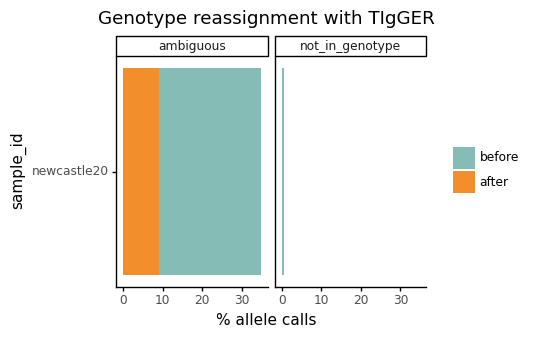

<ggplot: (1409504716689)>


Processing data file(s) : 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]


Concatenating objects
      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


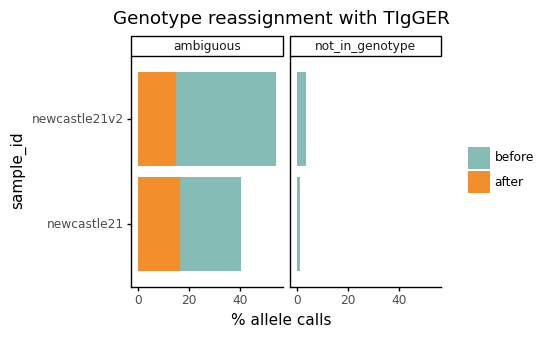

<ggplot: (1409499630789)>


Processing data file(s) : 100%|██████████| 1/1 [00:04<00:00,  4.79s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


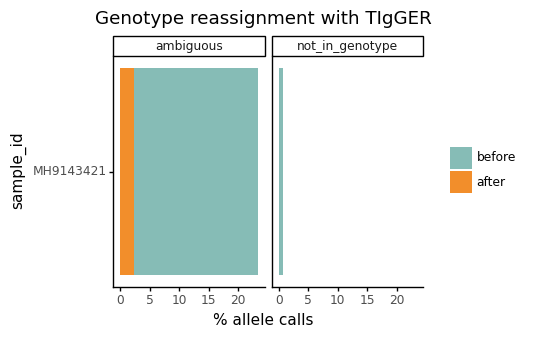

<ggplot: (1409495231141)>


Processing data file(s) : 100%|██████████| 1/1 [00:04<00:00,  4.52s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


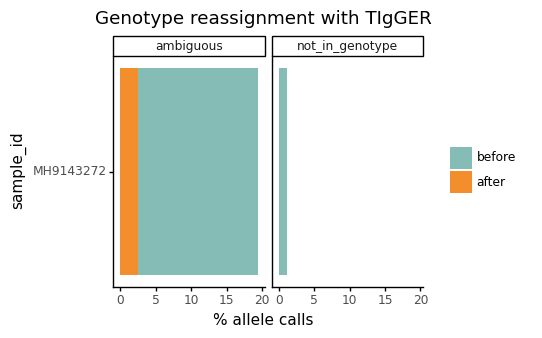

<ggplot: (1409496717033)>


Processing data file(s) : 100%|██████████| 1/1 [00:09<00:00,  9.70s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


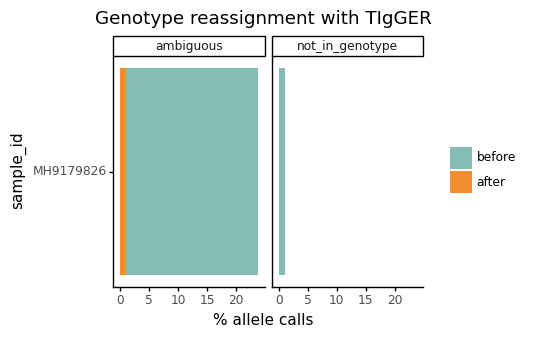

<ggplot: (1409493717273)>


Processing data file(s) : 100%|██████████| 1/1 [00:08<00:00,  8.32s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


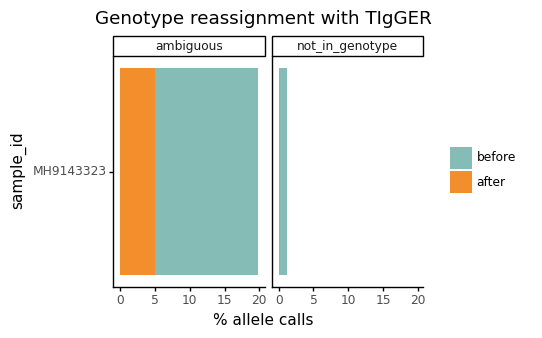

<ggplot: (1409497467941)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.58s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


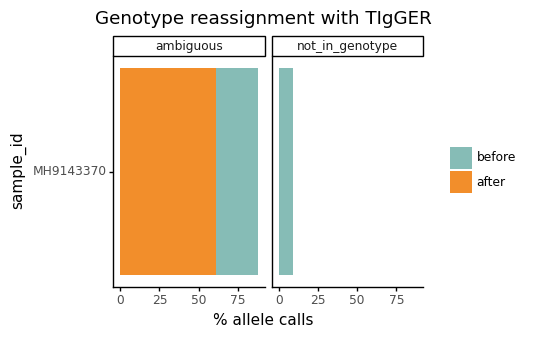

<ggplot: (1409491550081)>


Processing data file(s) : 100%|██████████| 1/1 [00:04<00:00,  4.99s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


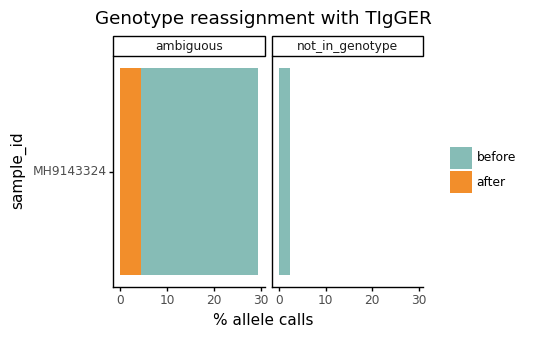

<ggplot: (1409496644833)>


Processing data file(s) : 100%|██████████| 3/3 [00:08<00:00,  2.94s/it]


Concatenating objects
      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


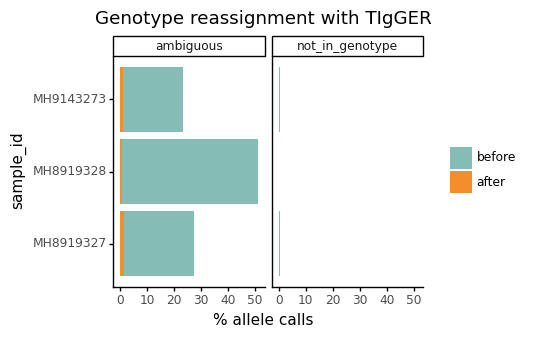

<ggplot: (1409485209349)>


Processing data file(s) : 100%|██████████| 1/1 [00:04<00:00,  4.24s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


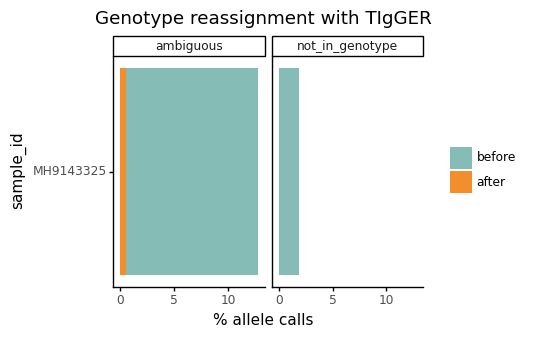

<ggplot: (1409487576565)>


Processing data file(s) : 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


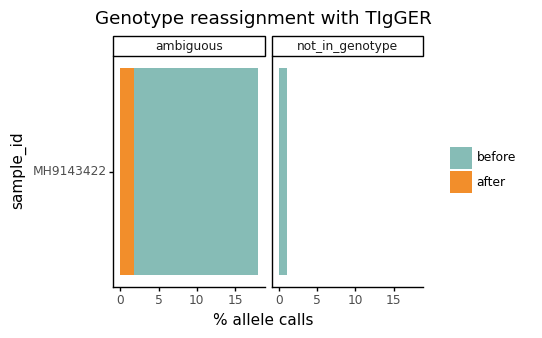

<ggplot: (1409487577001)>


Processing data file(s) : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


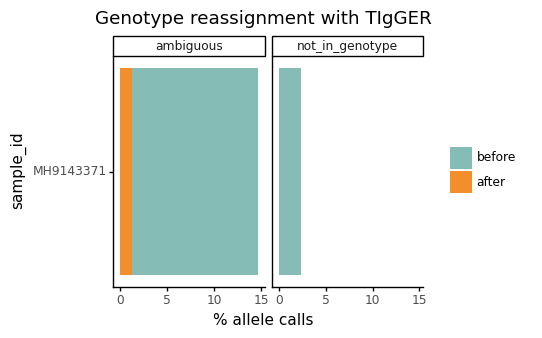

<ggplot: (1409485270445)>


Processing data file(s) : 100%|██████████| 1/1 [00:03<00:00,  3.97s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


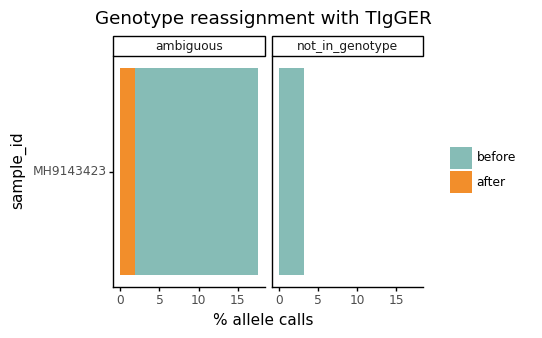

<ggplot: (1409505191837)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.73s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


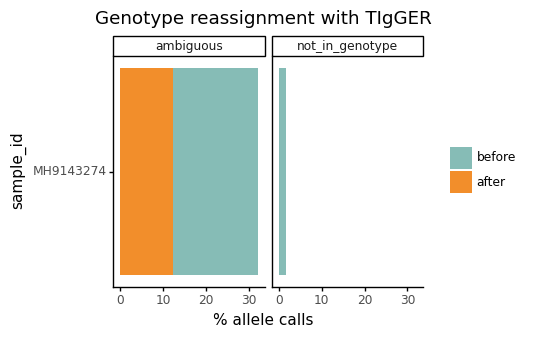

<ggplot: (1409504784161)>


Processing data file(s) : 100%|██████████| 1/1 [00:03<00:00,  3.50s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


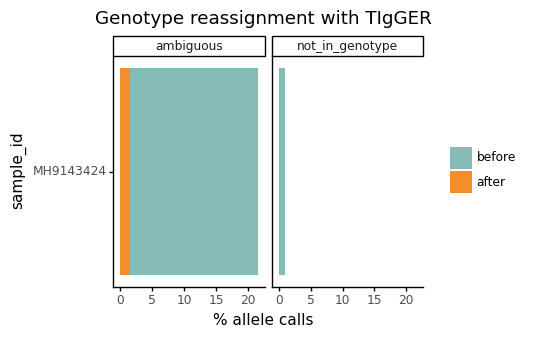

<ggplot: (1409504274141)>


Processing data file(s) : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


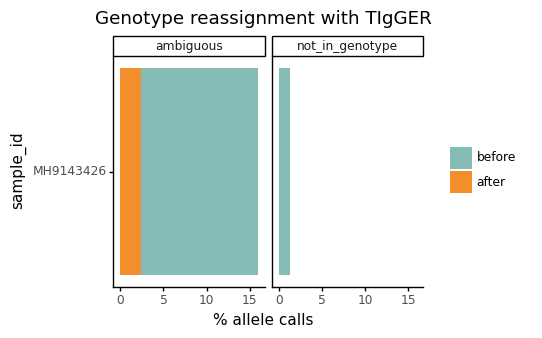

<ggplot: (1409498168541)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.93s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


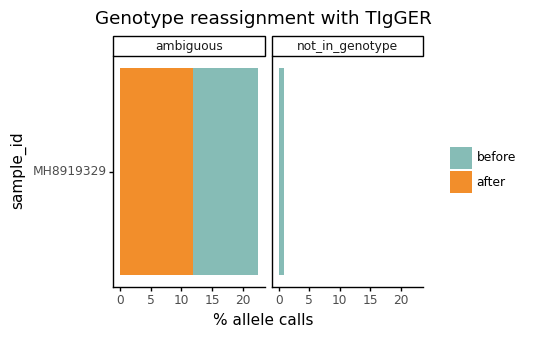

<ggplot: (1409497730229)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.68s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


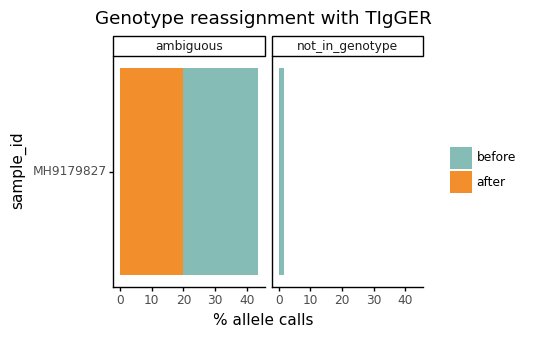

<ggplot: (1409497329421)>


Processing data file(s) : 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


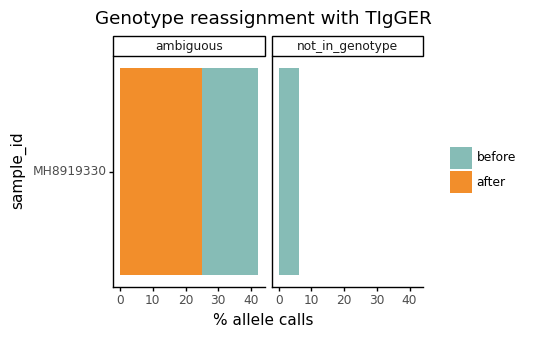

<ggplot: (1409496621029)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


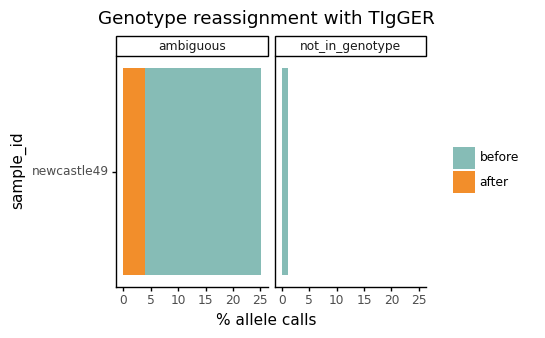

<ggplot: (1409496373369)>


Processing data file(s) : 100%|██████████| 1/1 [00:04<00:00,  4.11s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


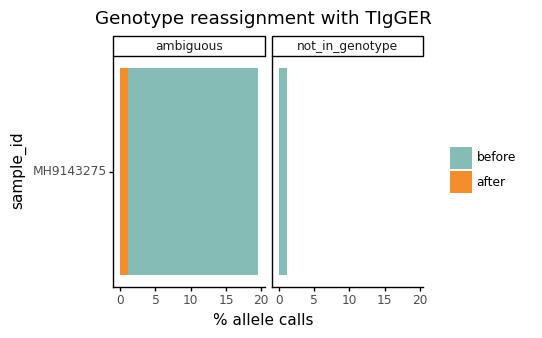

<ggplot: (1409497730753)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


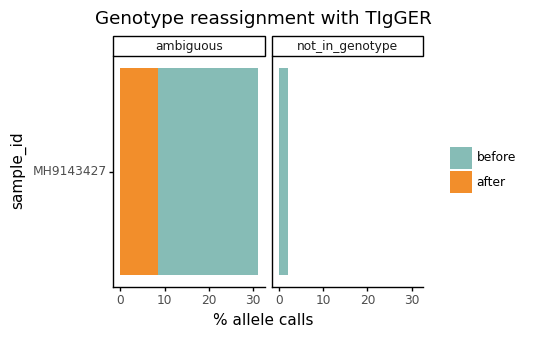

<ggplot: (1409494371141)>


Processing data file(s) : 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


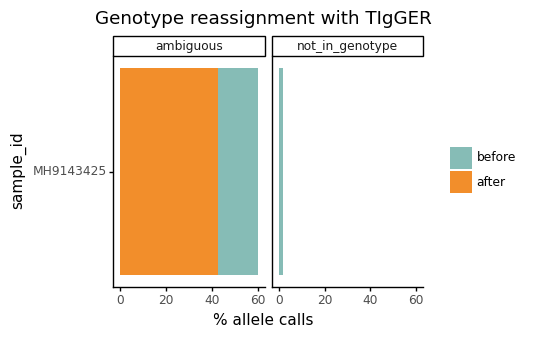

<ggplot: (1409493299769)>


Processing data file(s) : 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


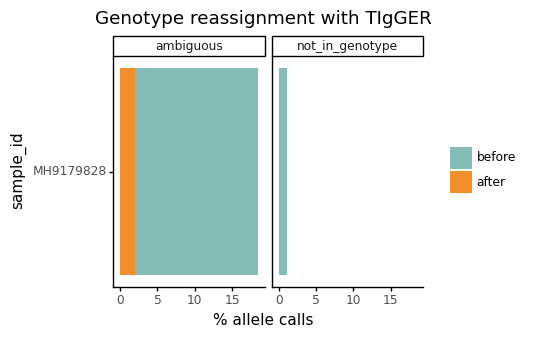

<ggplot: (1409493214445)>


Processing data file(s) : 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


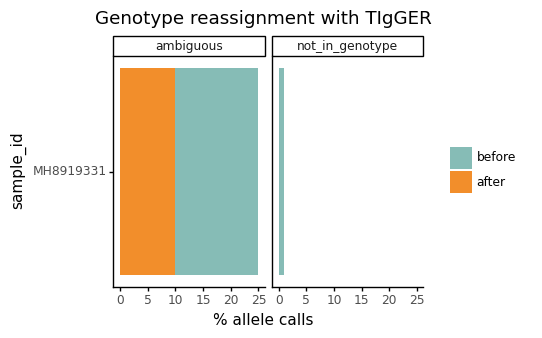

<ggplot: (1409487578133)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


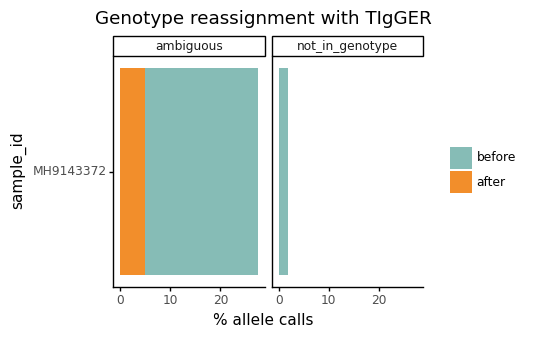

<ggplot: (1409493268389)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


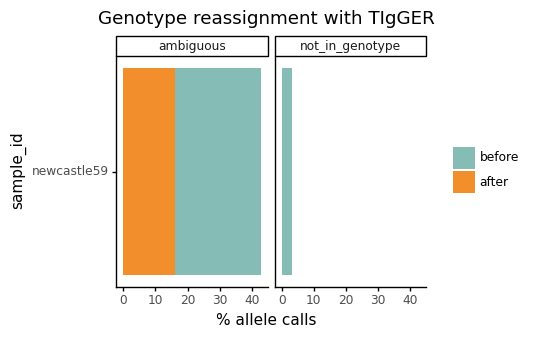

<ggplot: (1409505796837)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.64s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


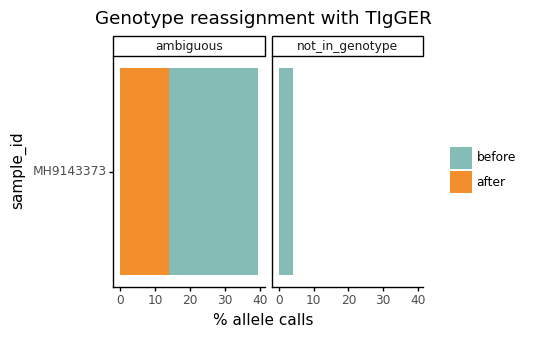

<ggplot: (1409504780353)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.39s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


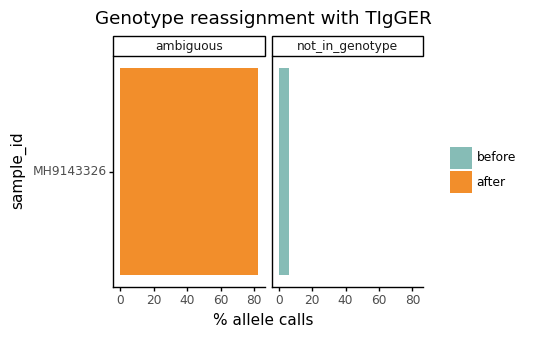

<ggplot: (1409498814609)>


Processing data file(s) : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


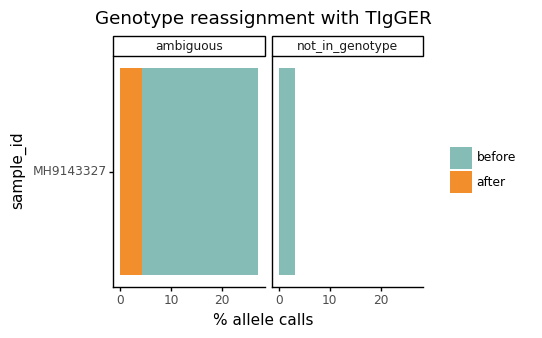

<ggplot: (1409498138685)>


Processing data file(s) : 100%|██████████| 1/1 [00:02<00:00,  2.25s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


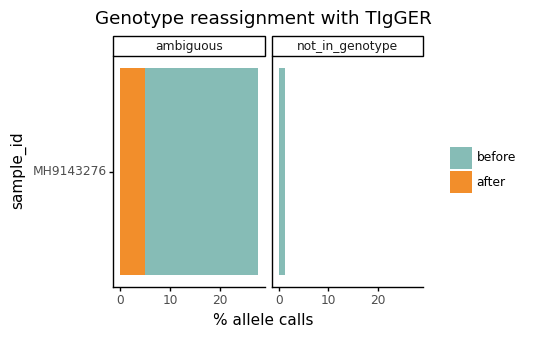

<ggplot: (1409497275973)>


Processing data file(s) : 100%|██████████| 1/1 [00:04<00:00,  4.95s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


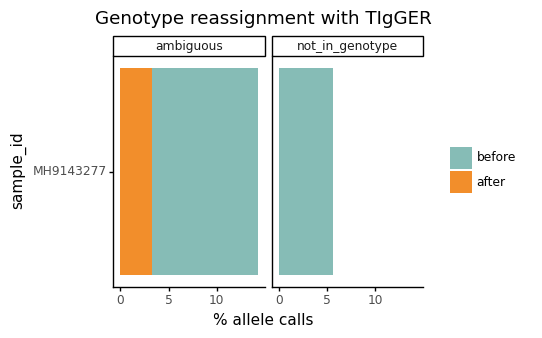

<ggplot: (1409497769397)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.52s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


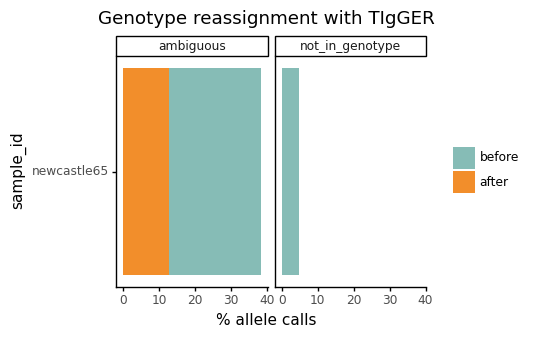

<ggplot: (1409497409777)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


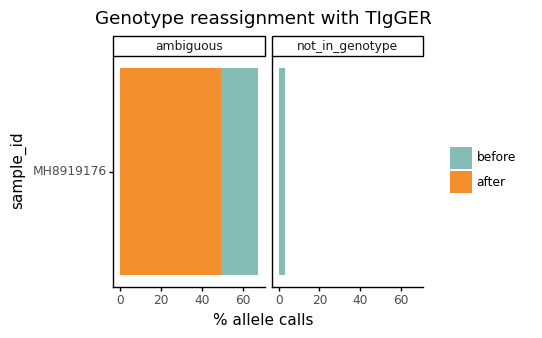

<ggplot: (1409497121849)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


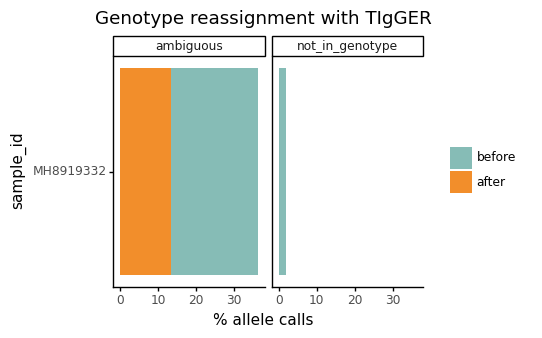

<ggplot: (1409497099441)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


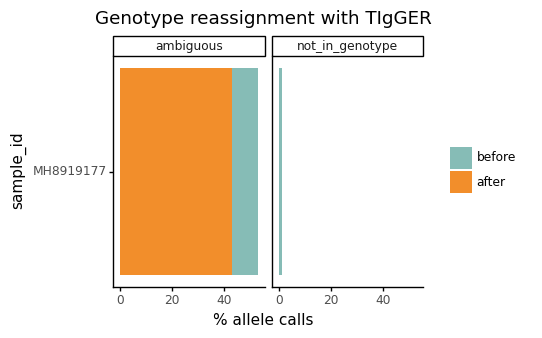

<ggplot: (1409496466605)>


Processing data file(s) : 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


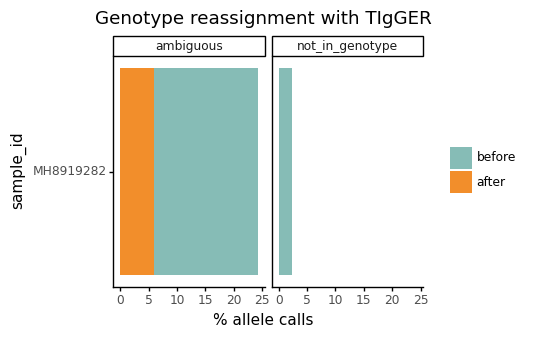

<ggplot: (1409496478337)>


Processing data file(s) : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


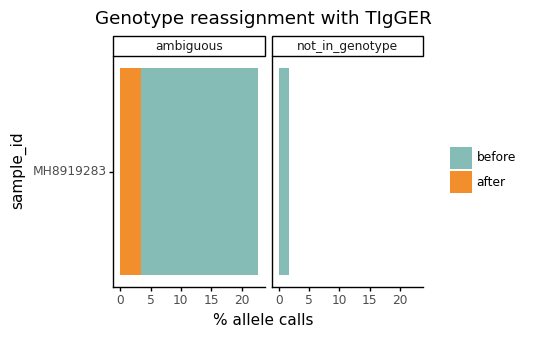

<ggplot: (1409505704037)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


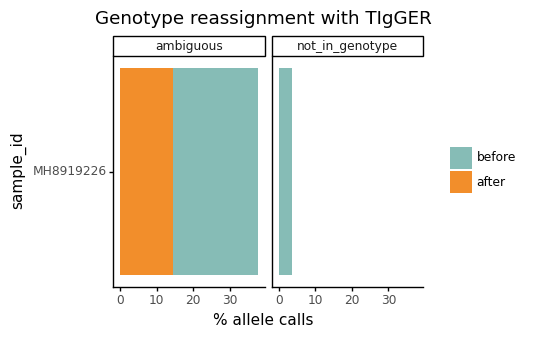

<ggplot: (1409498098073)>


Processing data file(s) : 100%|██████████| 1/1 [00:03<00:00,  3.34s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


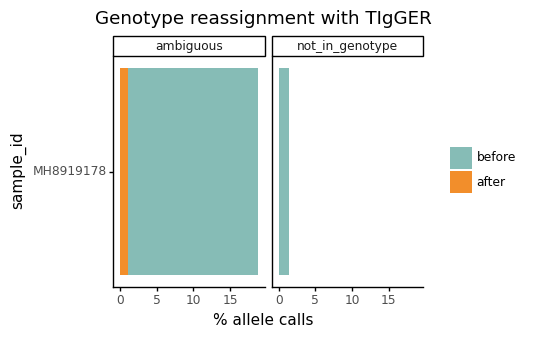

<ggplot: (1409497047521)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


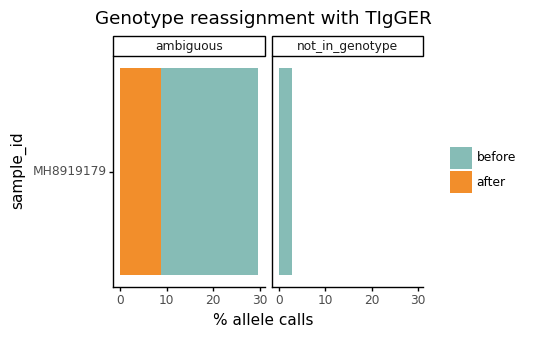

<ggplot: (1409496847721)>


Processing data file(s) : 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


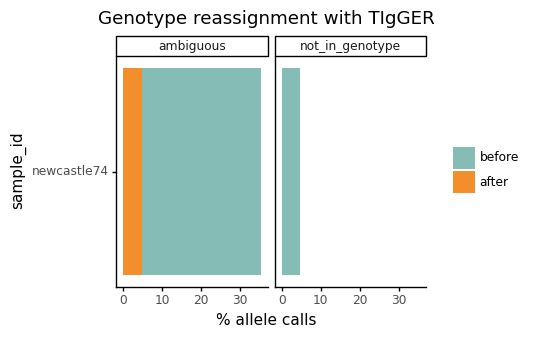

<ggplot: (1409496286469)>


Processing data file(s) : 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


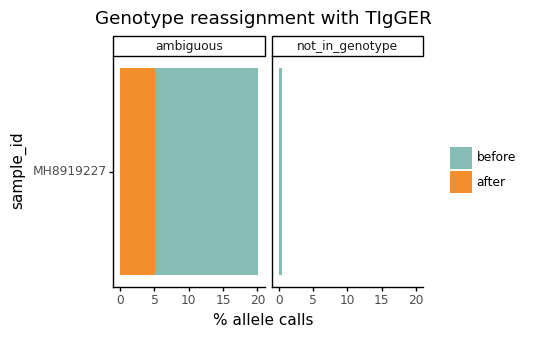

<ggplot: (1409504851721)>


Processing data file(s) : 100%|██████████| 1/1 [00:04<00:00,  4.04s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


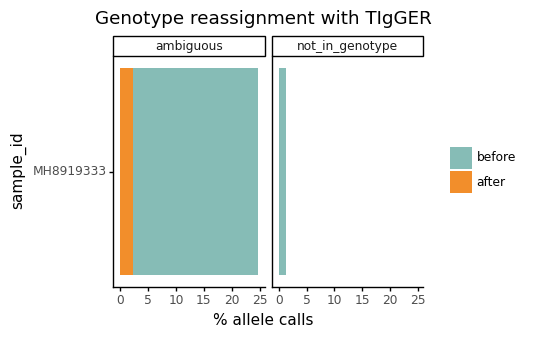

<ggplot: (1409496847641)>


Processing data file(s) : 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]


Concatenating objects
      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


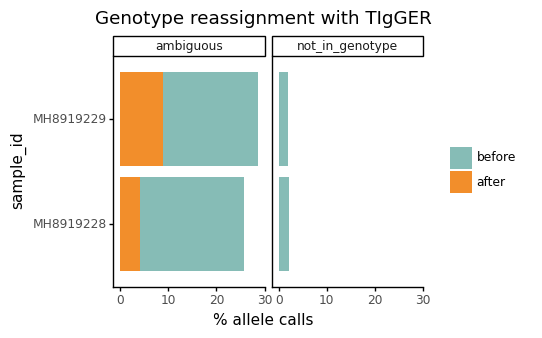

<ggplot: (1409497513921)>


Processing data file(s) : 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]


Concatenating objects
      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


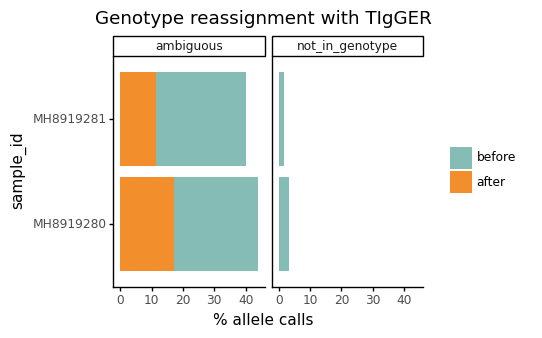

<ggplot: (1409496741989)>


Processing data file(s) : 100%|██████████| 2/2 [00:03<00:00,  1.98s/it]


Concatenating objects
      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


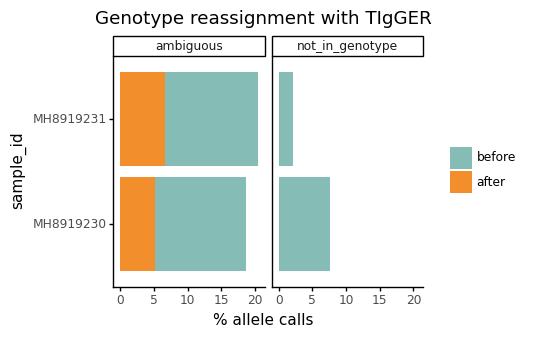

<ggplot: (1409495357933)>


Processing data file(s) : 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]


Concatenating objects
      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


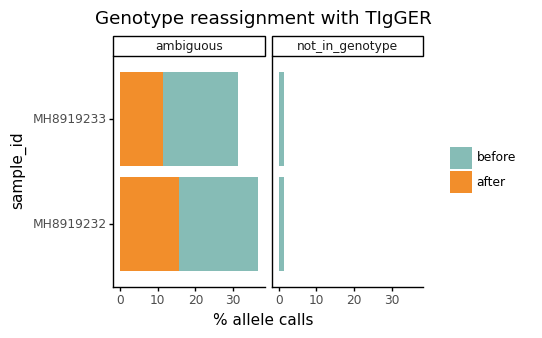

<ggplot: (1409494803117)>


Processing data file(s) : 100%|██████████| 2/2 [00:02<00:00,  1.47s/it]


Concatenating objects
      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


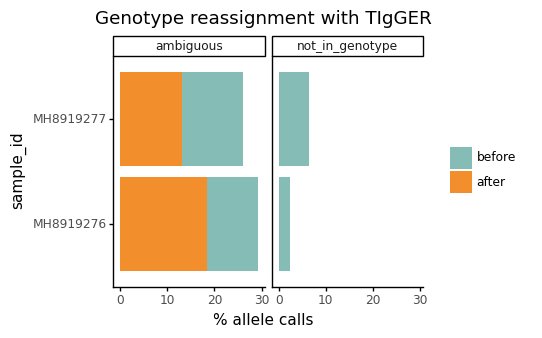

<ggplot: (1409496717625)>


Processing data file(s) : 100%|██████████| 2/2 [00:07<00:00,  3.86s/it]


Concatenating objects
      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germlines sequence with v_call_genotyped.
            Reconstructing light chain dmask germlines sequence with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


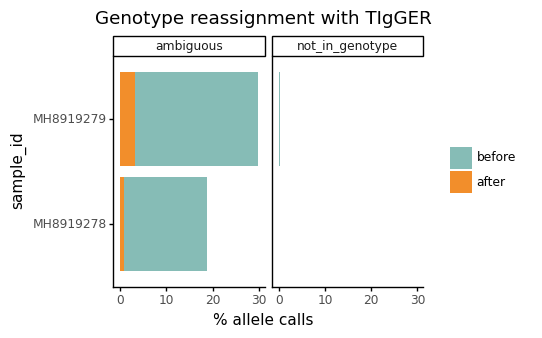

<ggplot: (1409494630313)>


Writing out to individual folders : 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]


In [13]:
# sample dict here is for creating a sample_id column in the concatenated file.
for concatenated_folder, individual_folders in group_dict.items():
    ddl.pp.reassign_alleles(individual_folders, combined_folder = concatenated_folder, sample_id_dictionary = sampledict2)

Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 1042/1042 [00:03<00:00, 263.13it/s]


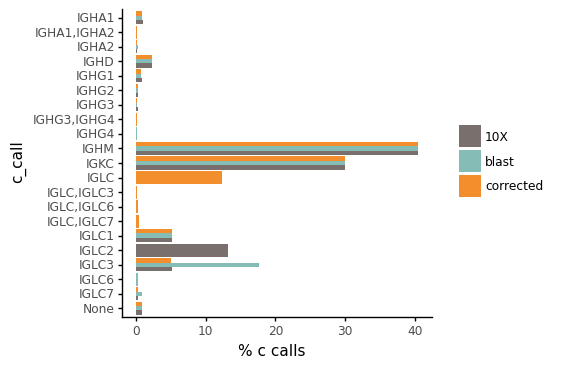

<ggplot: (1409506580449)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 2679/2679 [00:10<00:00, 252.40it/s]


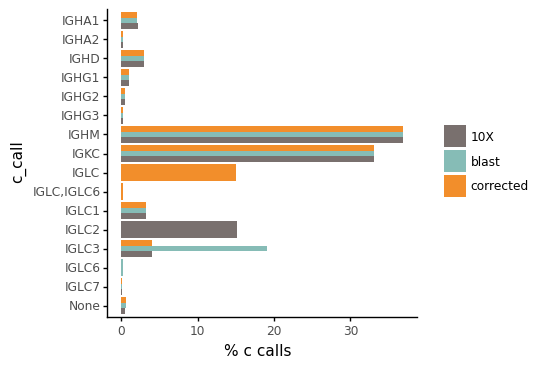

<ggplot: (1409497047837)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 3523/3523 [00:18<00:00, 194.08it/s]


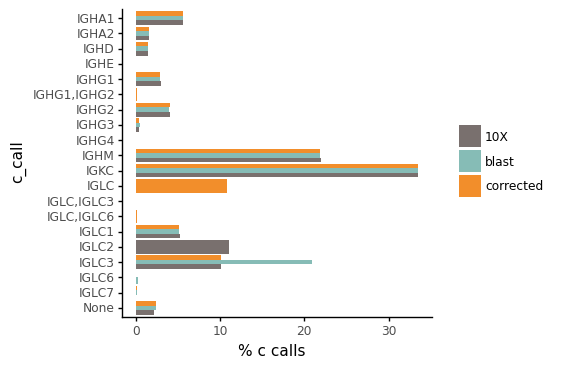

<ggplot: (1409497390113)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 1512/1512 [00:02<00:00, 622.35it/s]


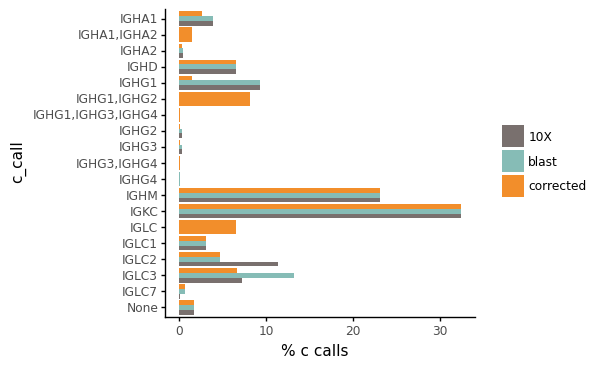

<ggplot: (1409505822073)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 4350/4350 [00:30<00:00, 141.06it/s]


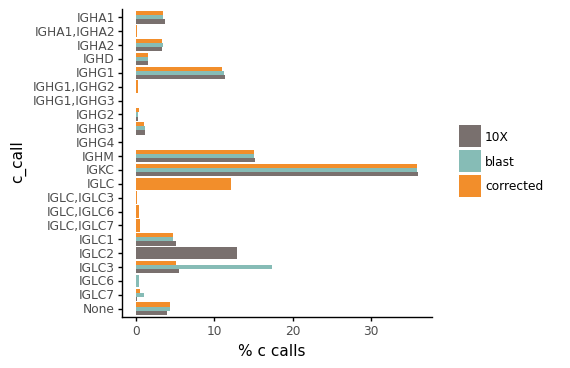

<ggplot: (1409499901053)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 10301/10301 [02:41<00:00, 63.64it/s]


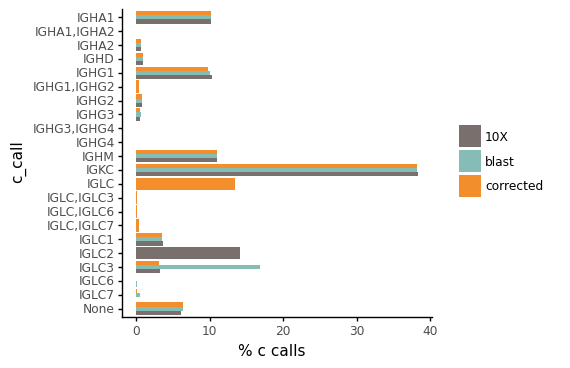

<ggplot: (1409504343933)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 6834/6834 [01:13<00:00, 92.75it/s]


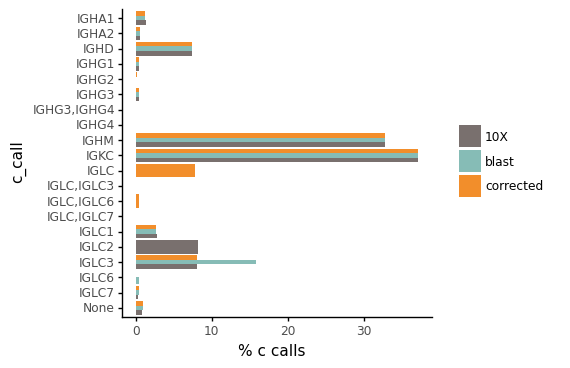

<ggplot: (1409493868653)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 8176/8176 [01:55<00:00, 70.68it/s]


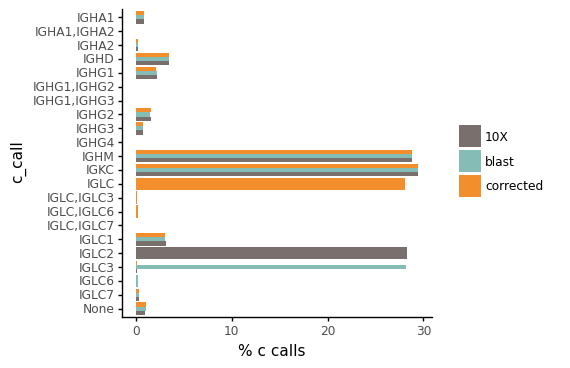

<ggplot: (1409499773617)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 4276/4276 [00:28<00:00, 149.34it/s]


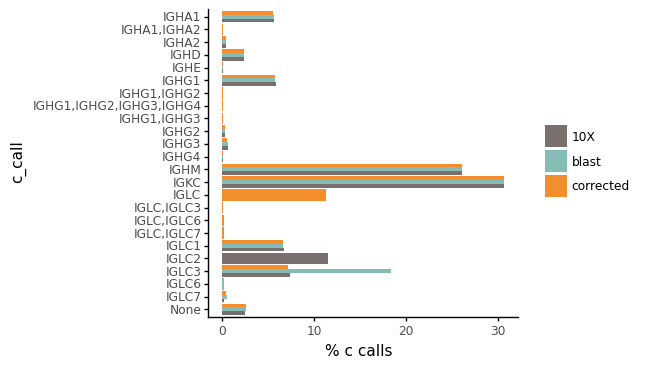

<ggplot: (1409493877805)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 7961/7961 [01:37<00:00, 81.79it/s]


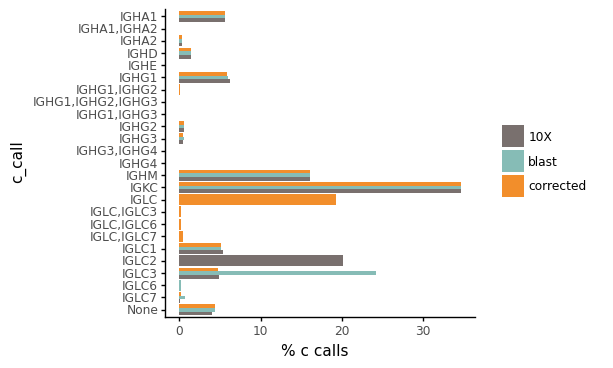

<ggplot: (1409499623397)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 12178/12178 [03:54<00:00, 51.86it/s]


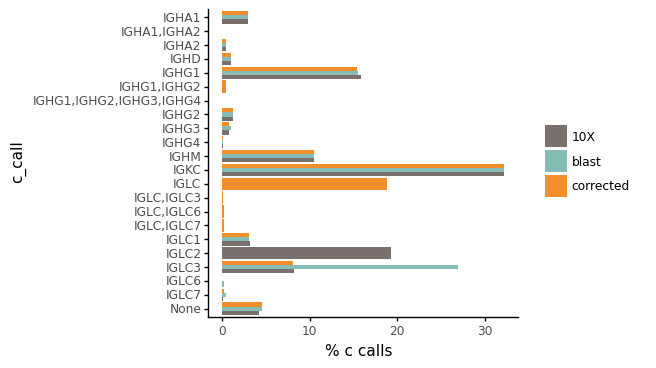

<ggplot: (1409504687169)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 3861/3861 [00:21<00:00, 176.30it/s]


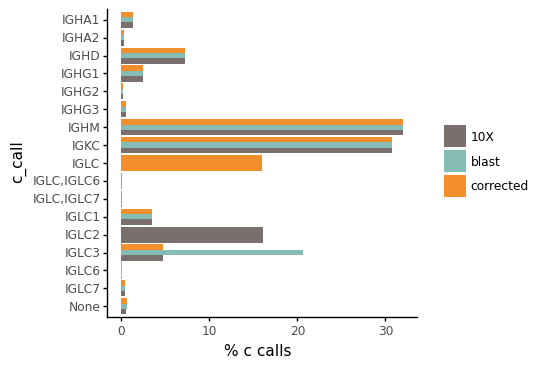

<ggplot: (1409496605793)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 5863/5863 [00:50<00:00, 116.14it/s]


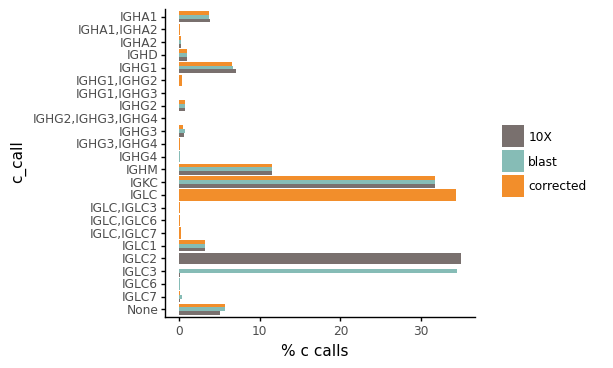

<ggplot: (1409491593545)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 1391/1391 [00:03<00:00, 417.80it/s]


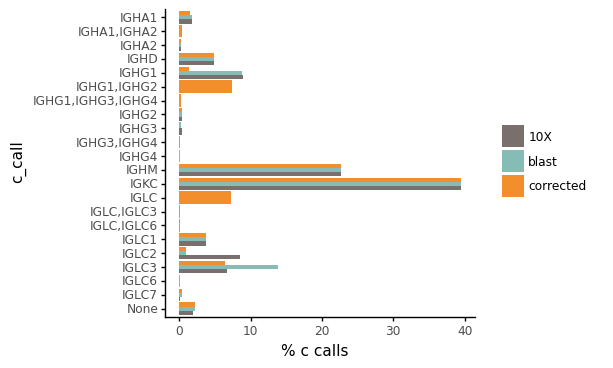

<ggplot: (1409505832713)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 635/635 [00:01<00:00, 492.13it/s]


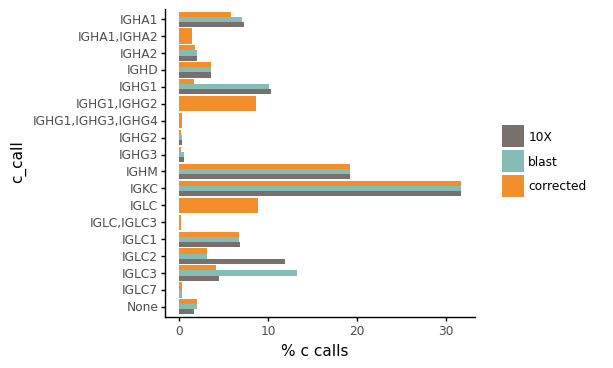

<ggplot: (1409505242629)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 382/382 [00:00<00:00, 529.49it/s]


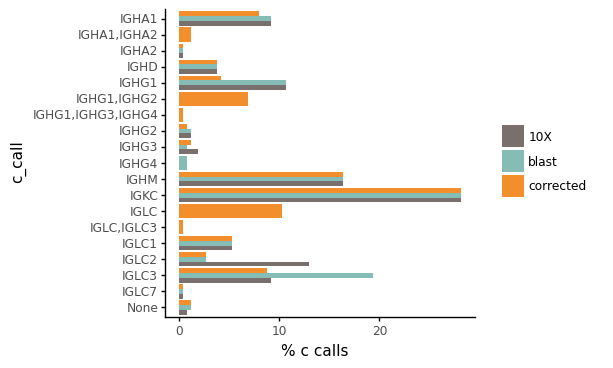

<ggplot: (1409506482773)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 7117/7117 [01:24<00:00, 83.76it/s] 


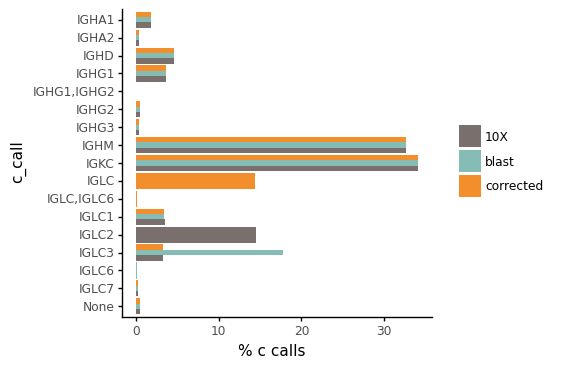

<ggplot: (1409499828413)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 5692/5692 [00:55<00:00, 102.23it/s]


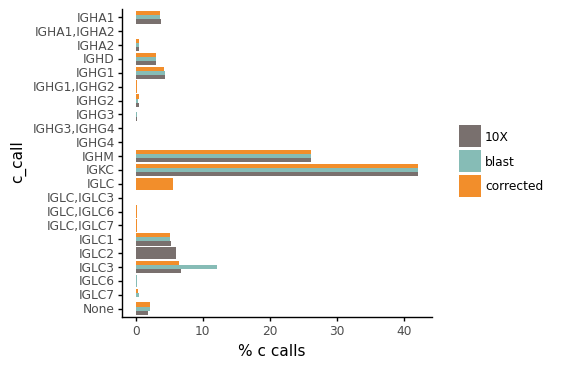

<ggplot: (1409496753925)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 9956/9956 [02:39<00:00, 62.23it/s]


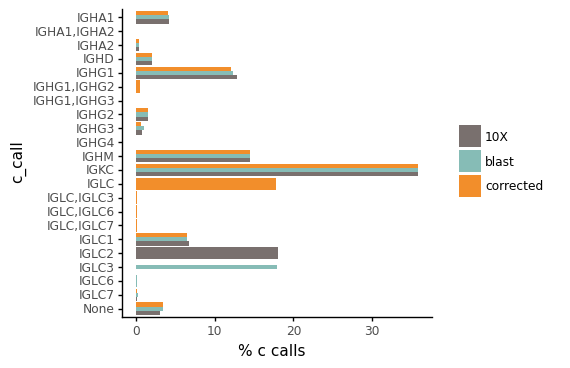

<ggplot: (1409498354793)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 10392/10392 [02:50<00:00, 60.98it/s]


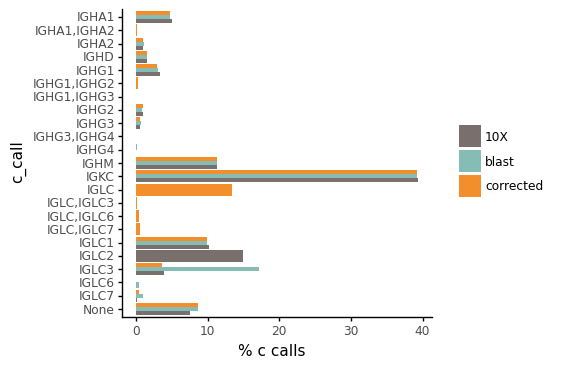

<ggplot: (1409498633393)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 414/414 [00:00<00:00, 553.59it/s]


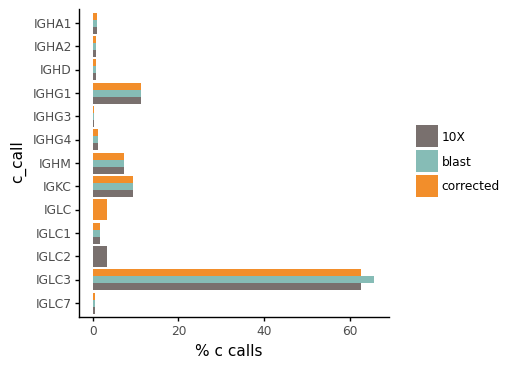

<ggplot: (1409504268845)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 7167/7167 [01:13<00:00, 98.11it/s] 


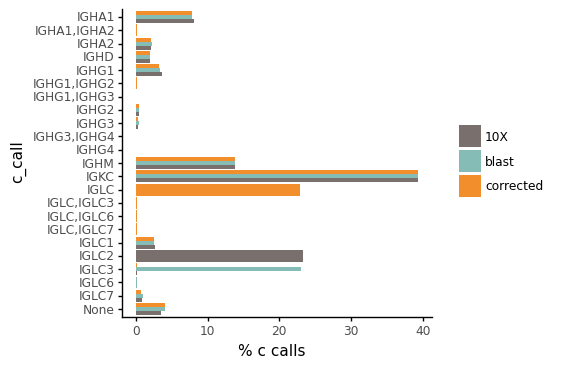

<ggplot: (1409498900217)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 2879/2879 [00:13<00:00, 218.18it/s]


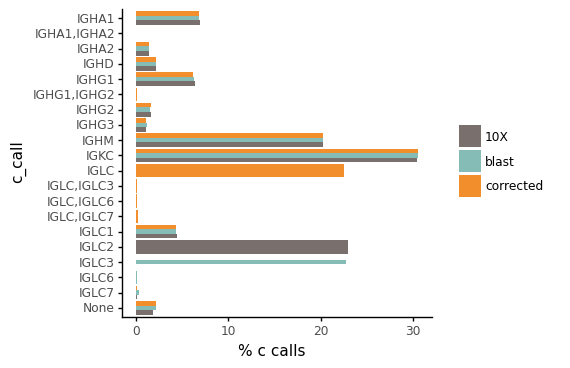

<ggplot: (1409498829145)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 6590/6590 [01:04<00:00, 101.76it/s]


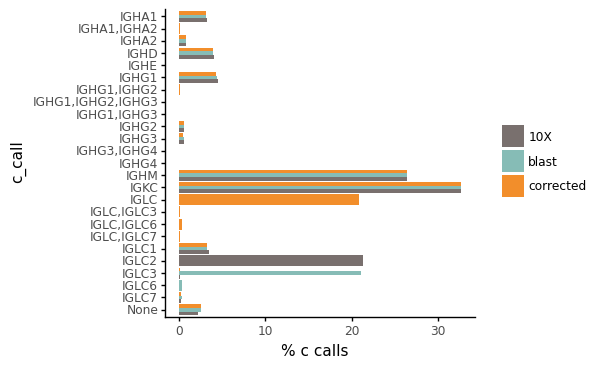

<ggplot: (1409496065773)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 4252/4252 [00:26<00:00, 163.27it/s]


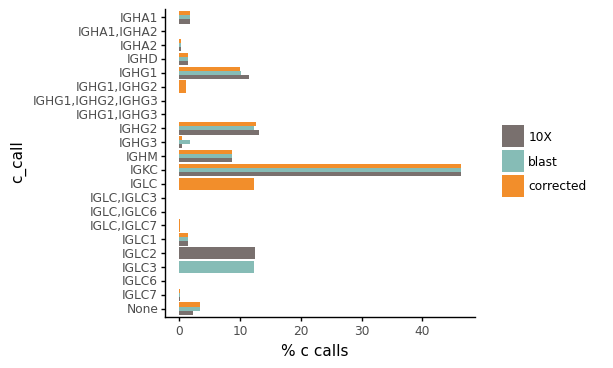

<ggplot: (1409505779665)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 8813/8813 [01:57<00:00, 75.11it/s]


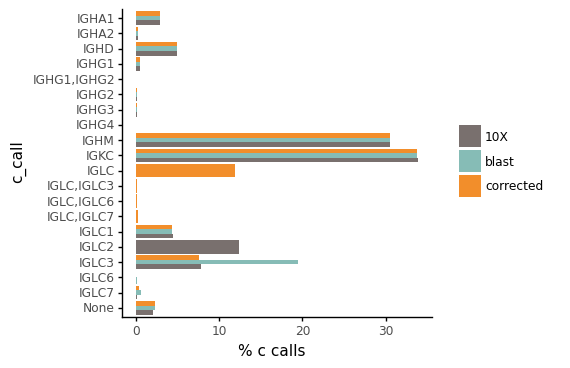

<ggplot: (1409498984869)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 6112/6112 [01:04<00:00, 95.27it/s] 


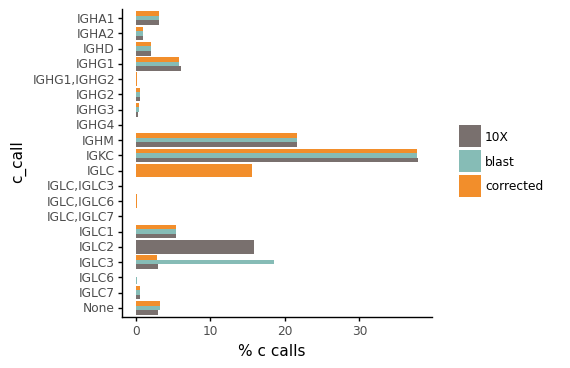

<ggplot: (1409496429653)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 5169/5169 [00:45<00:00, 113.09it/s]


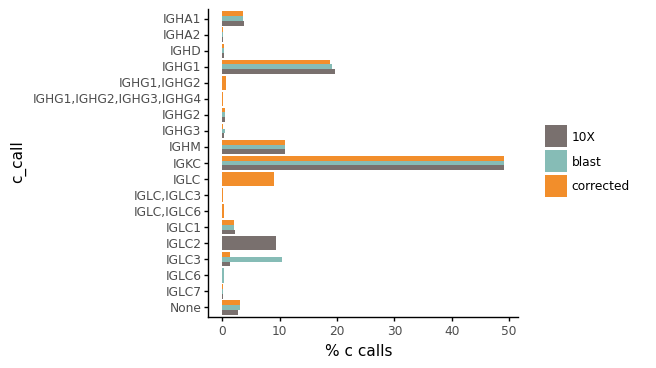

<ggplot: (1409504687125)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 8397/8397 [01:52<00:00, 74.42it/s]


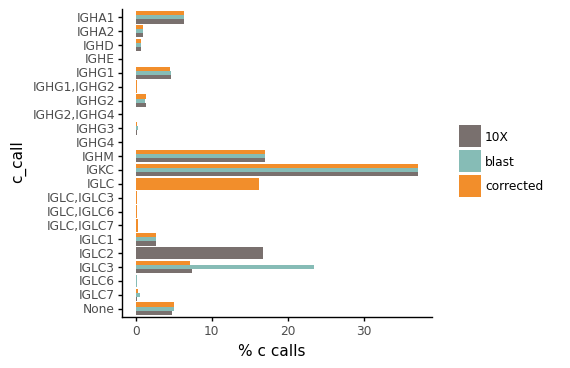

<ggplot: (1409499874329)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 1050/1050 [00:01<00:00, 859.36it/s]


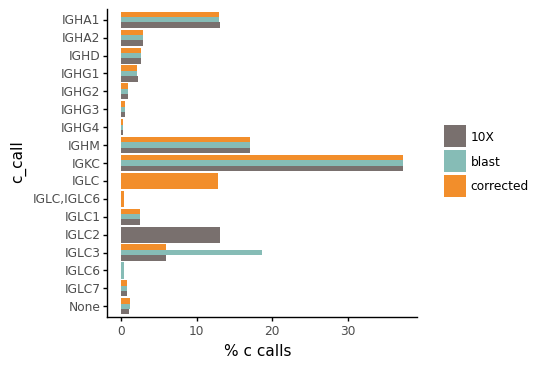

<ggplot: (1409499495265)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 6824/6824 [01:13<00:00, 93.13it/s] 


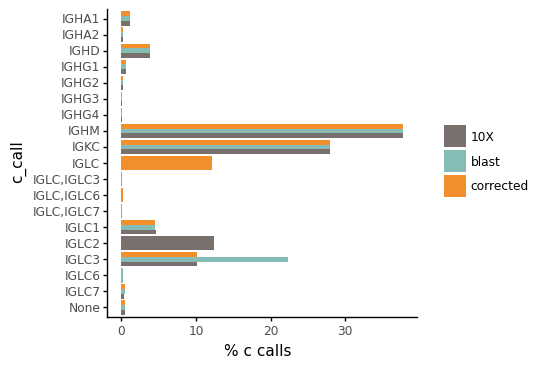

<ggplot: (1409492138141)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 5820/5820 [00:54<00:00, 106.95it/s]


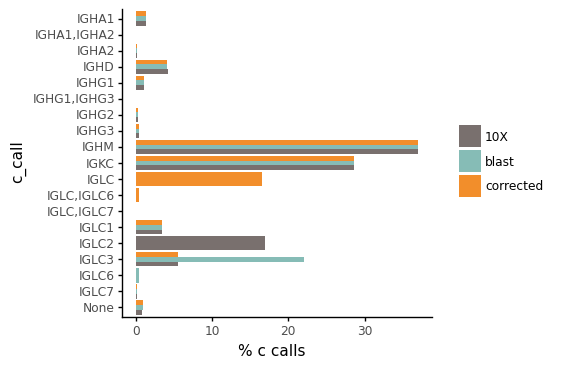

<ggplot: (1409504738021)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 1741/1741 [00:04<00:00, 391.77it/s]


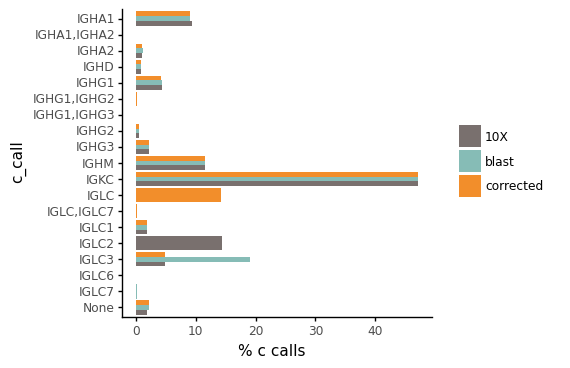

<ggplot: (1409496421525)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 760/760 [00:01<00:00, 425.78it/s]


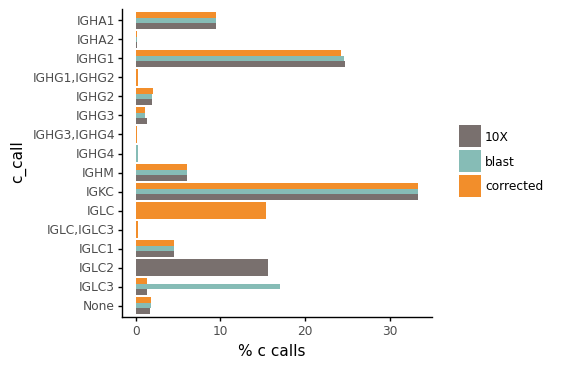

<ggplot: (1409505634837)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 3208/3208 [00:15<00:00, 208.92it/s]


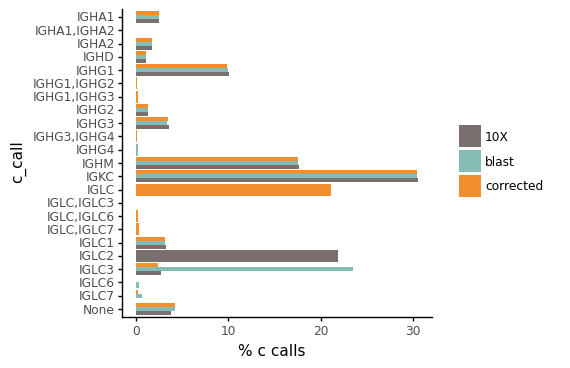

<ggplot: (1409488678613)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 709/709 [00:01<00:00, 592.53it/s]


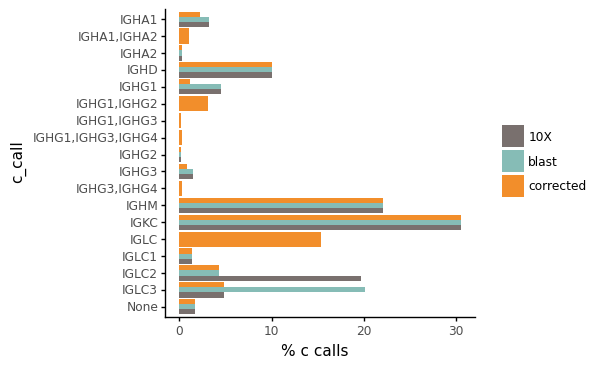

<ggplot: (1409497447117)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 8352/8352 [01:55<00:00, 72.51it/s]


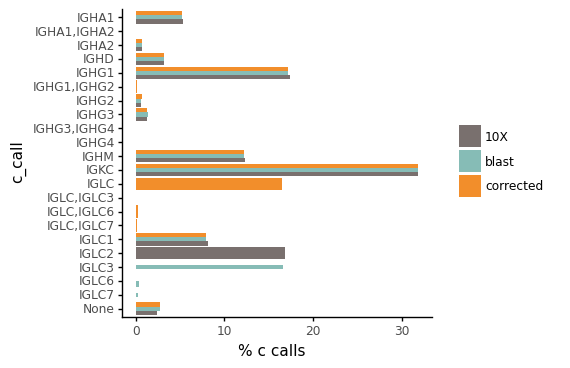

<ggplot: (1409499496581)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 1419/1419 [00:02<00:00, 474.62it/s]


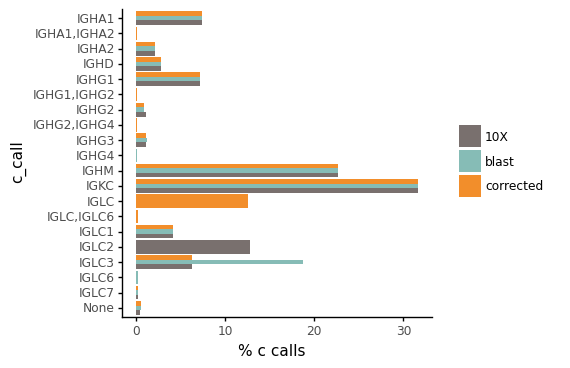

<ggplot: (1409494938109)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 1939/1939 [00:05<00:00, 354.75it/s]


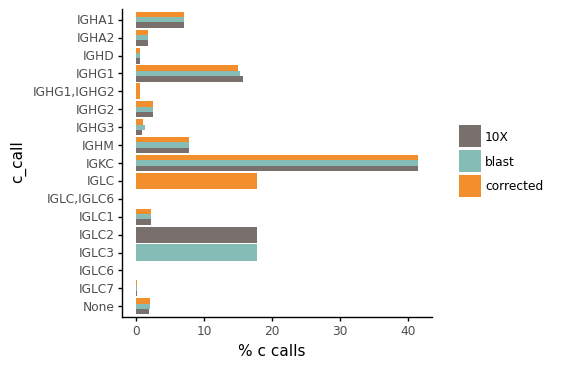

<ggplot: (1409494931037)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 3570/3570 [00:19<00:00, 179.58it/s]


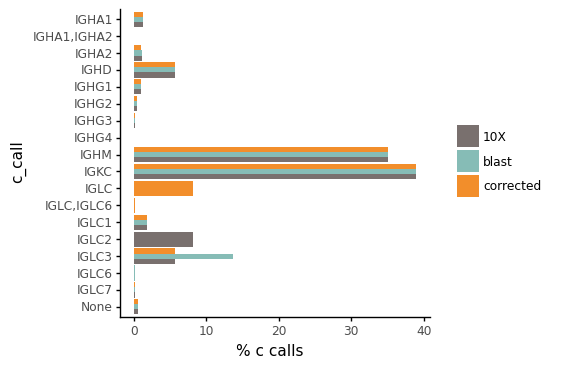

<ggplot: (1409496785797)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 2096/2096 [00:06<00:00, 314.49it/s]


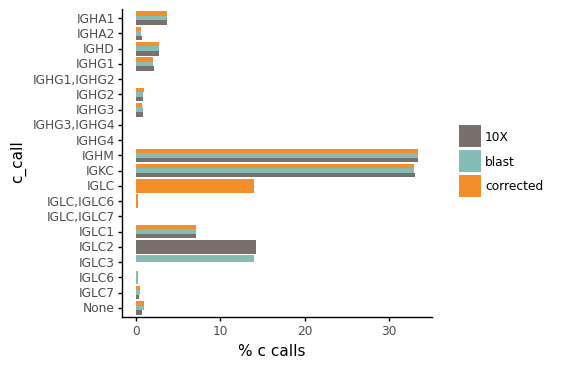

<ggplot: (1409504708173)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 1667/1667 [00:04<00:00, 369.57it/s]


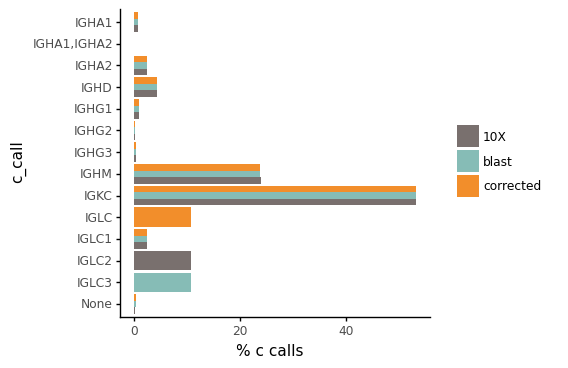

<ggplot: (1409497968401)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 758/758 [00:01<00:00, 688.81it/s]


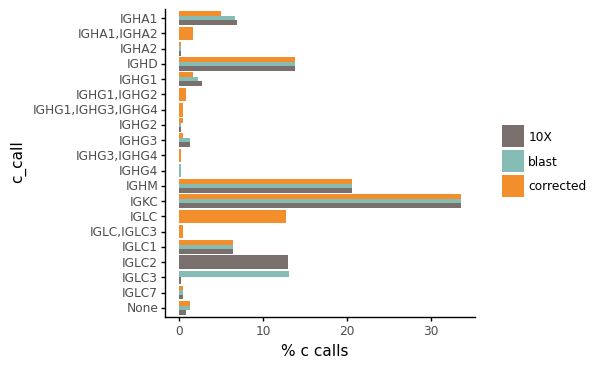

<ggplot: (1409496968385)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 754/754 [00:01<00:00, 646.59it/s]


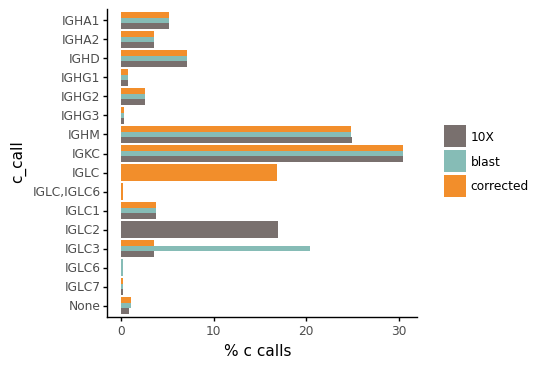

<ggplot: (1409497433377)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 59/59 [00:00<00:00, 4305.89it/s]


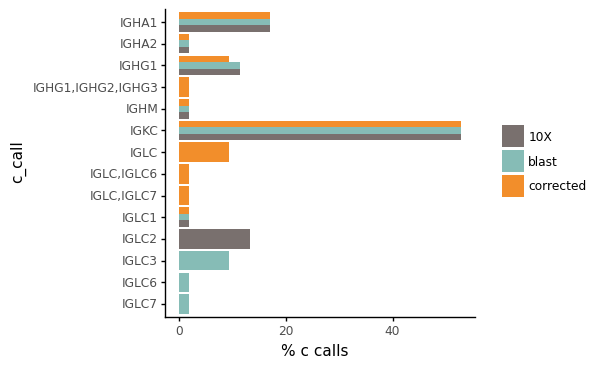

<ggplot: (1409504712221)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 5771/5771 [00:46<00:00, 123.03it/s]


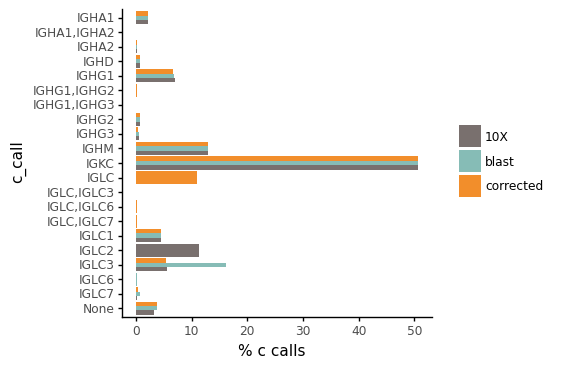

<ggplot: (1409499611525)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 2752/2752 [00:10<00:00, 253.84it/s]


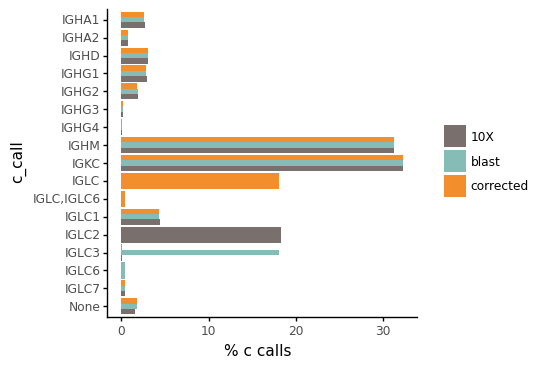

<ggplot: (1409505594865)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 11142/11142 [03:07<00:00, 59.54it/s]


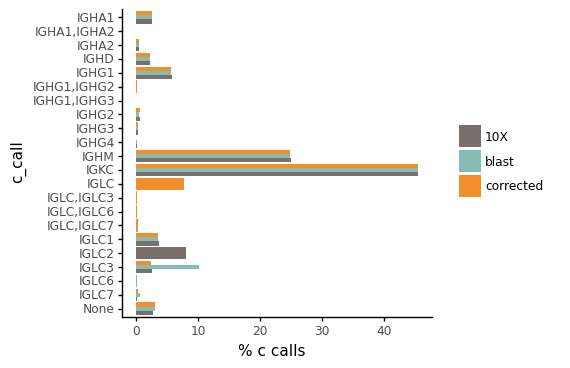

<ggplot: (1409497192437)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 594/594 [00:01<00:00, 578.44it/s]


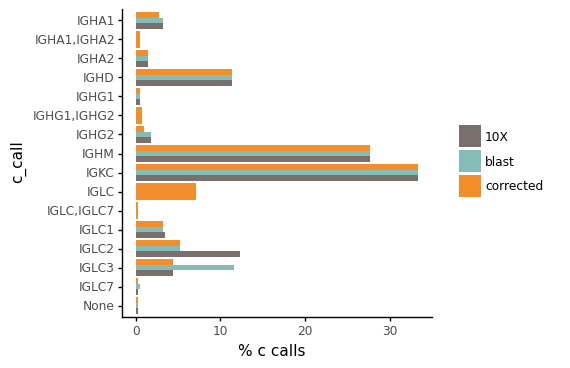

<ggplot: (1409496959105)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 495/495 [00:00<00:00, 1001.76it/s]


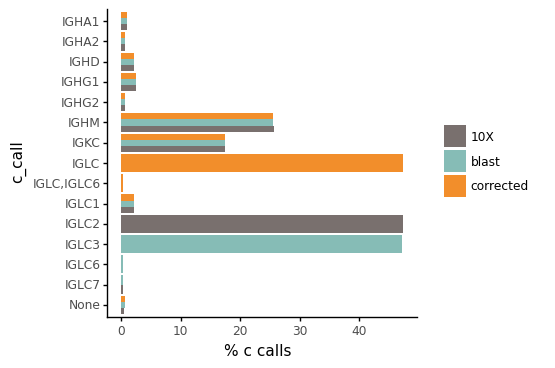

<ggplot: (1409498347589)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 803/803 [00:00<00:00, 856.33it/s]


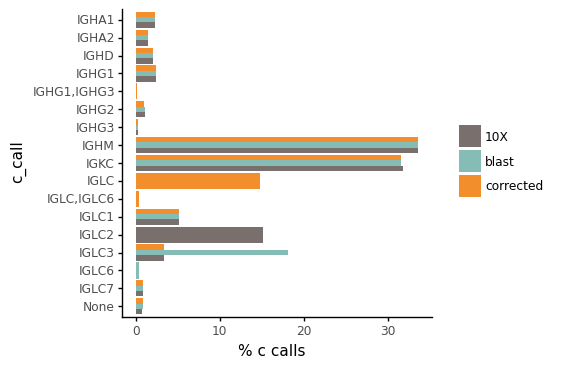

<ggplot: (1409494710121)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 161/161 [00:00<00:00, 739.06it/s]


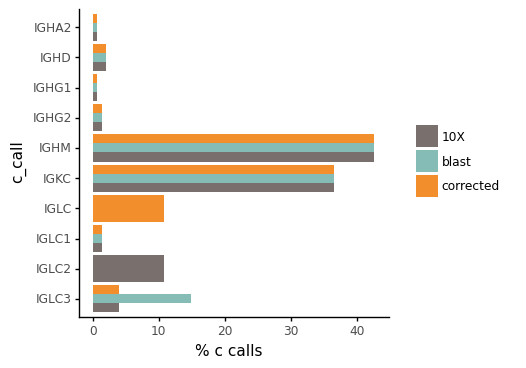

<ggplot: (1409499499105)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 1830/1830 [00:05<00:00, 349.01it/s]


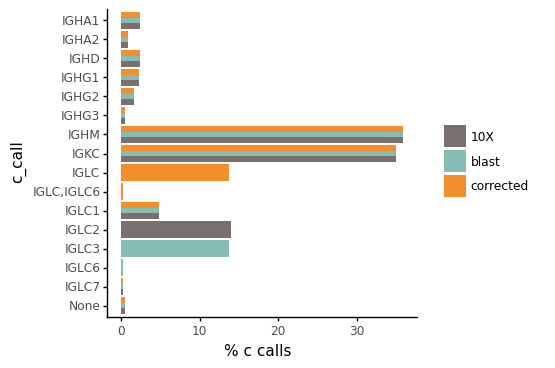

<ggplot: (1409504707437)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 3887/3887 [00:23<00:00, 163.18it/s]


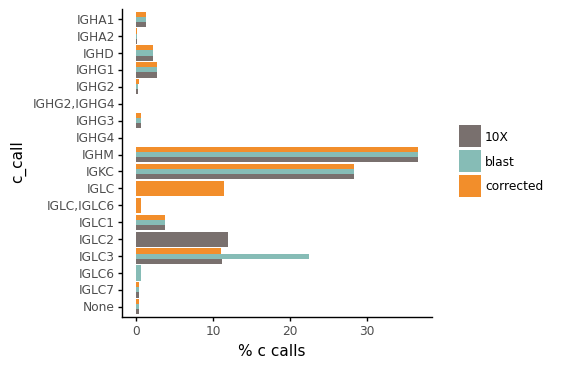

<ggplot: (1409498427125)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 604/604 [00:00<00:00, 634.68it/s]


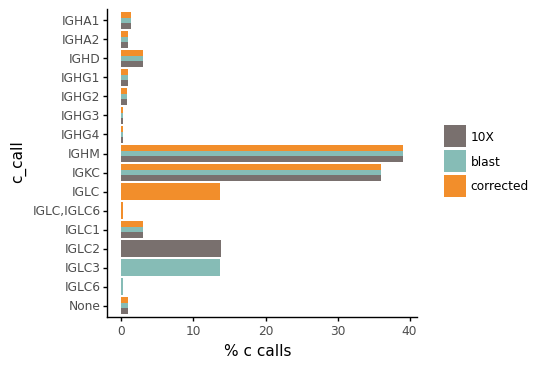

<ggplot: (1409494874081)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 4711/4711 [00:32<00:00, 143.80it/s]


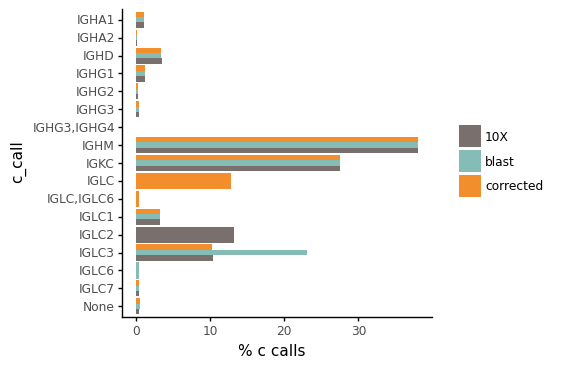

<ggplot: (1409491223029)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 899/899 [00:01<00:00, 670.12it/s]


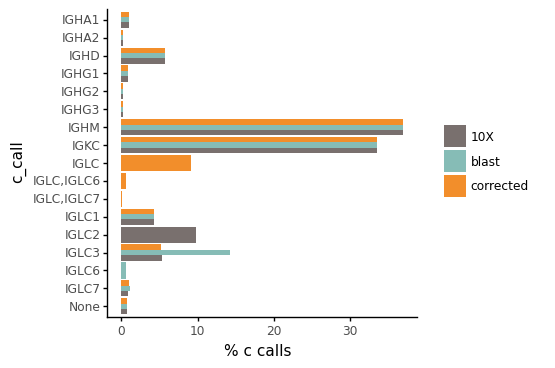

<ggplot: (1409498416065)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 2158/2158 [00:07<00:00, 296.62it/s]


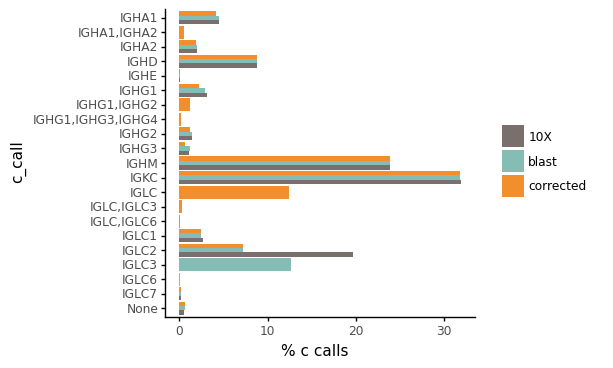

<ggplot: (1409496070641)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 1838/1838 [00:05<00:00, 317.92it/s]


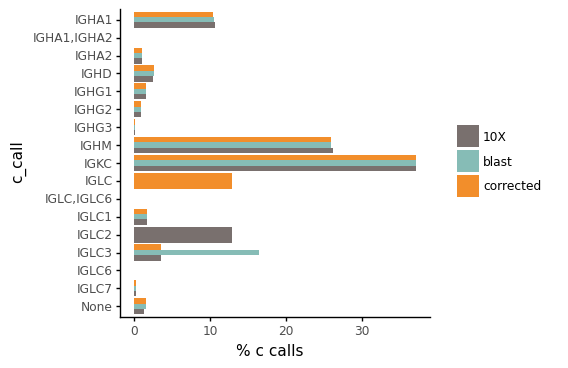

<ggplot: (1409494360585)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 5848/5848 [00:56<00:00, 104.24it/s]


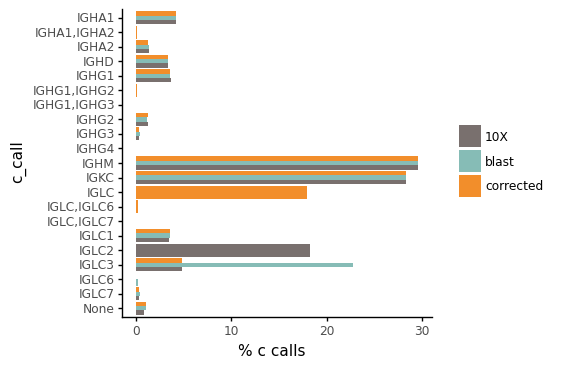

<ggplot: (1409499096481)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 588/588 [00:01<00:00, 375.33it/s]


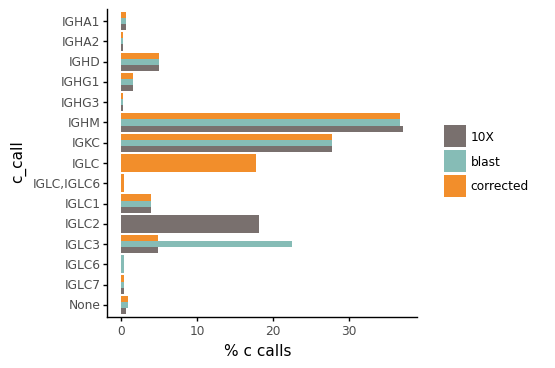

<ggplot: (1409499039729)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 212/212 [00:00<00:00, 641.69it/s]


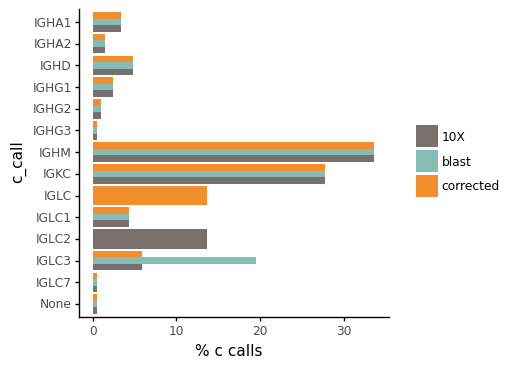

<ggplot: (1409504863473)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 480/480 [00:00<00:00, 561.13it/s]


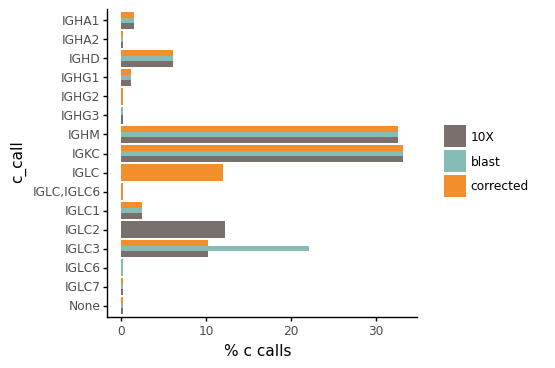

<ggplot: (1409506218313)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 418/418 [00:00<00:00, 739.72it/s]


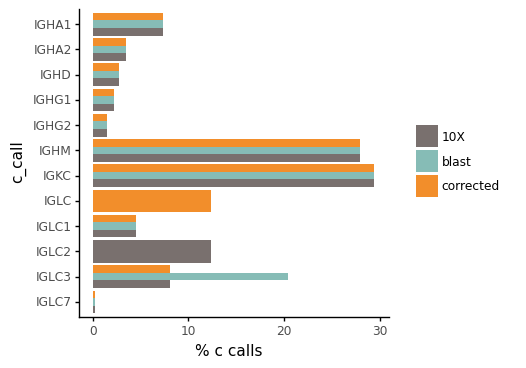

<ggplot: (1409506563025)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 2010/2010 [00:06<00:00, 311.91it/s]


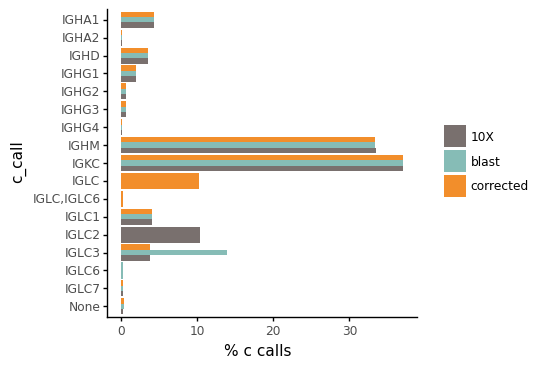

<ggplot: (1409499489641)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 1085/1085 [00:01<00:00, 575.19it/s]


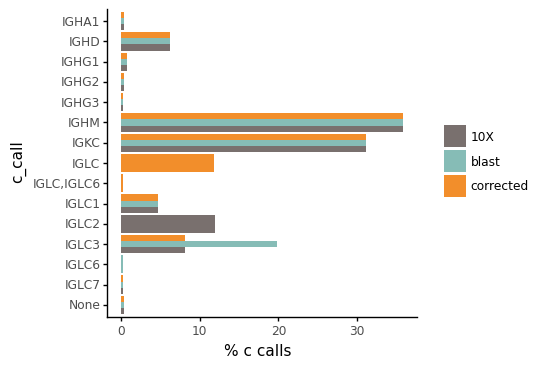

<ggplot: (1409497492733)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 902/902 [00:01<00:00, 798.13it/s]


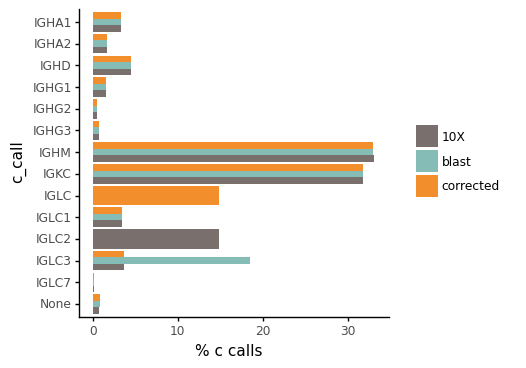

<ggplot: (1409499772409)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 357/357 [00:00<00:00, 679.51it/s]


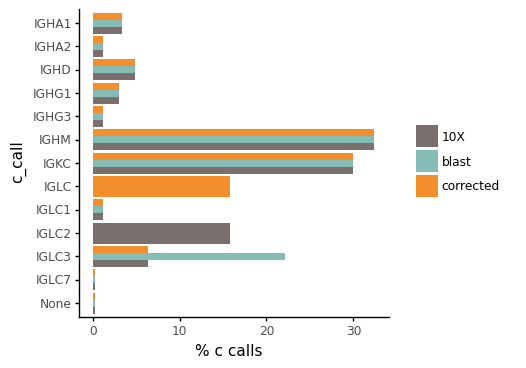

<ggplot: (1409497085597)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 119/119 [00:00<00:00, 4041.90it/s]


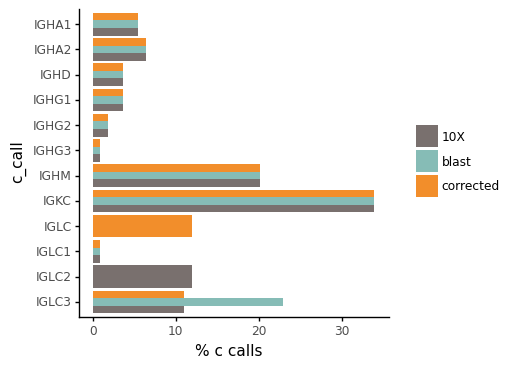

<ggplot: (1409506402697)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 362/362 [00:01<00:00, 327.89it/s]


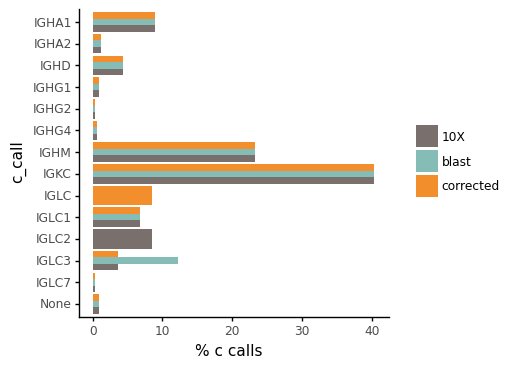

<ggplot: (1409486085901)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 6744/6744 [01:06<00:00, 100.71it/s]


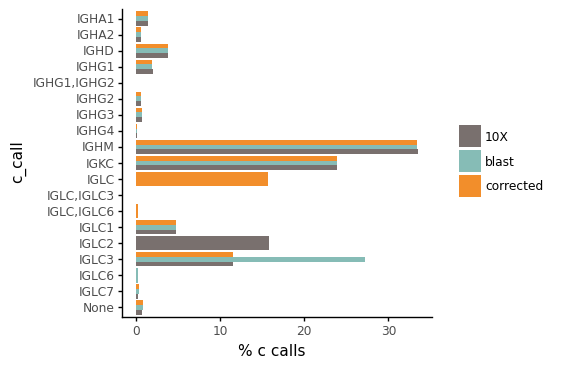

<ggplot: (1409500003189)>


Retrieving contant region calls, parallelizing with 31 cpus : 100%|██████████| 8384/8384 [01:50<00:00, 75.97it/s]


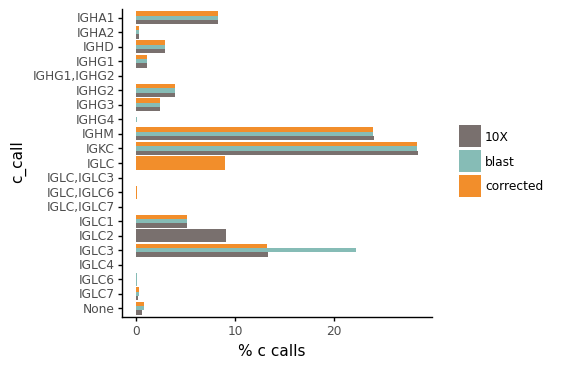

<ggplot: (1409497126301)>


In [14]:
ddl.pp.assign_isotypes(samples)

In [8]:
samples = ['BCR_' + str(s) for s in sampleInfo['BCR ID']]

In [9]:
from tqdm import tqdm
# quantify mutations
for s in tqdm(samples, desc = 'Basic mutational load analysis '):
    filePath = s+'/dandelion/data/filtered_contig_igblast_db-pass_genotyped.tsv'
    ddl.pp.quantify_mutations(filePath)

Basic mutational load analysis : 100%|██████████| 72/72 [38:32<00:00, 32.12s/it]  
